README:  
Introcuction: This script is for figure 3 in fullscope analysis(cell class type DTU analysis)  
Author: Y0NEKO  
Time: 2025.10.11 

In [ ]:
#load package

library(data.table)
library(qs)
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
library(dplyr)
library(ggbio)
library(reshape2)
library(ggsci)
library(viridis)
library(ggpubr)
library(ggh4x)
library(ggtranscript)
library(khroma)
library(bambu)
library(ggdensity)
library(Seurat)
library(scCustomize)
library(ComplexUpset)
#BiocManager::install("Nebulosa")
library(Nebulosa)
library(ggpubr)
library(ggplot2) # Create Elegant Data Visualisations Using the Grammar of Graphics
library(ggsignif) # Significance Brackets for 'ggplot2'
library(gghalves)
library(randomcoloR)

qs 0.25.5

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: I

In [3]:
#load data
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/")
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}
cellan = read.csv("../ref/T44/cell_type_type20230220-macaque1-contour2_v1.csv")
cellan = unique(cellan[,c("subclass","class")])
areaan = read.csv("../ref/area_annotation.csv")
gtf = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")
areaan = unique(areaan[c("L0","L3")])
colnames(areaan) = c("lobe","area")
areaan[areaan$area == "1/2",]$area = "1|2"

In [ ]:
fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_fil_delete_multiread_25_10_09.qs")
isosigls = qread(file = "data/dtu_analysis/dtu_isoform_ls_fsraw_cor_25_10_10.qs")
fsraw.cor = fsraw.cor[fsraw.cor$class != "",]
longbed = qread("ref/long_read_mapping_total_rawnano_total_fil_24_11_12.qs")
head(longbed)
srtt = qread("data/meta_cell_ngs/umap_srt_combined_with_isoform_25_12_03.qs")

In [17]:
datas3 = list()

In [12]:
theme_presentation<- function(base_size = 16, base_family = "") {
  # Starts with theme_grey and then modify some parts
  theme_bw(base_size = base_size, base_family = base_family) %+replace%
    theme(
      strip.background = element_blank(),
      strip.text.x = element_text(size=16,colour="white"),
      strip.text.y = element_text(size=16,colour="white"),
      axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks =  element_blank(), 
      axis.title.x= element_blank(),
      axis.title.y= element_blank(),
      panel.background = element_rect(fill="black"), 
      panel.border =element_blank(),  
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.margin = unit(1.0, "lines"), 
      plot.background = element_rect(fill="black"), 
      plot.title =element_text(size=16,colour="white"), 
      # plot.margin = unit(c(1,  1, 1, 1), "lines"),
      legend.background=element_rect(fill='black'),
      legend.title=element_text(size=12,colour="white"),
      legend.text=element_text(size=12,colour="white"),
      legend.key = element_rect( fill = 'black'),
      # legend.key.size = unit(c(0, 0), "lines"),
      axis.line.x = element_blank(),
      axis.line.y = element_blank()
    )
}

In [13]:
suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')

### Celltype spatial and MetaCell annotation

In [ ]:
fsraw = qread("main_data_read_total_annotation")

In [ ]:
cellanuq = qread("ref/cellball_annotation_n10_24_04_03.qs")
head(cellanuq)

In [ ]:
cellanuq = cellanuq[cellanuq$layer %in% paste0("l",1:6),]
nrow(cellanuq)

In [ ]:
cellanuq.meta = cellanuq %>% group_by(metacell,class,subclass,layer) %>% summarise(x = mean(x),y = mean(y),cellnum = length(unique(cell_id)))

In [ ]:
pmetacp = ggplot(data = cellanuq, aes(x, y,color = layer)) +
    scattermore::geom_scattermore(
        pointsize = 1.5
      ) +
    # geom_pointdensity(size = 0.1) +
    scale_color_discreterainbow() +
    # scale_color_viridis(option = "D") +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cell subclass")) +
    facet_wrap(~subclass) +
    theme_presentation() + scale_y_reverse() + scale_x_reverse()
pmetacp
ggexport(pmetacp, filename = "result/figure2/subclass_annotation_facet_wrap_24_05_14.pdf", width = 12, height = 12)

In [ ]:
pmetacp2 = ggplot(data = cellanuq, aes(x, y,color = layer)) +
    scattermore::geom_scattermore(
        pointsize = 1.5
      ) +
    # geom_pointdensity(size = 0.1) +
    scale_color_discreterainbow() +
    # scale_color_viridis(option = "D") +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cell subclass")) +
    facet_grid(~class) +
    theme_presentation() + scale_y_reverse() + scale_x_reverse()
pmetacp2
ggexport(pmetacp2, filename = "result/figure2/class_annotation_facet_wrap_24_05_14.pdf", width = 8, height = 2.4)

In [ ]:
pmetacp = ggplot(data = cellanuq,aes(x, y)) +
    geom_pointdensity(size = 0.01) + 
    scale_color_viridis(option = "D") +
    #scale_color_smoothrainbow(discrete = T) +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cell subclass")) +
    facet_wrap(~subclass) +
    theme_presentation() + 
    scale_y_reverse() + 
    scale_x_reverse()
pmetacp

### Long read MetaCell UMAP

In [ ]:
gtfdf = as.data.frame(gtf)
gtfdf$gene_idnew = gtfdf$gene_id
gtfdf[gtfdf$seqnames == "NC_012670.1",]$gene_idnew = paste0("MT-",gtfdf[gtfdf$seqnames == "NC_012670.1",]$gene_id)
genenm = unique(gtfdf[,c("gene_id","gene_idnew")])
nrow(genenm)

In [ ]:
#build meta cell
cellan = qread("../ref/T44_cell_pos_type_area_annotation_nobackground_23_08_16.qs")
cellanuq = cellan[!is.na(cellan$cell_id),] %>% group_by(cell_id, class, subclass, cell_type, areaid,layer) %>% 
summarise(x = mean(x),y = mean(y))

n = 10
CellBallCluster = function(n,x,y){
    data = data.frame("x" = x, "y" = y)
    num_clusters <- ceiling(nrow(data) / n)
    kmeans_result <- kmeans(data[c("x","y")], centers = num_clusters)
    return(kmeans_result$cluster)
}

cellanuq = cellanuq  %>% group_by(areaid,layer,class,subclass) %>% mutate(cluster = CellBallCluster(n,x,y))


In [ ]:
cellanuq$metacell = paste0(cellanuq$class,"-",cellanuq$subclass,"-",cellanuq$layer,"-",cellanuq$areaid,"-",cellanuq$cluster)
cellanuq = cellanuq %>% group_by(metacell) %>% 
      mutate(cellnum = length(unique(cell_id)))
summary(cellanuq$cellnum)
length(unique(cellanuq$metacell))
qsave(cellanuq,file = "ref/cellball_annotation_n10_24_10_24.qs")

In [ ]:
length(unique(cellanuq[cellanuq$cellnum > 3,]$metacell))
#summary(cellanuq.old$cellnum)
length(unique(cellanuq.old[cellanuq.old$cellnum > 3,]$metacell))

In [ ]:
#cellanuq = qread("ref/cellball_annotation_n10_24_04_03.qs")
cellanuq = qread("ref/cellball_annotation_n10_24_10_24.qs")
cellanuq = cellanuq %>% group_by(cell_id) %>% filter(n() == 1)
cellanuq = cellanuq[cellanuq$layer %in% paste0("l",1:6),]
cellanuq = cellanuq[cellanuq$cellnum > 3,]
nrow(cellanuq)

[1] 380986

In [ ]:
head(cellanuq)
datas3$metacell = cellanuq

cell_id,class,subclass,cell_type,areaid,layer,x,y,cluster,metacell,cellnum
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>
2,GLU,L5/6,GLU L5/6.8 RXFP1/KRT17,VIP,l6,22809.65,52865.12,39,GLU-L5/6-l6-VIP-39,5
8,GLU,L6,GLU L6.8 SYT6/SEMA3E,v23b,l2,15164.54,73537.81,2,GLU-L6-l2-v23b-2,6
18,GABA,RELN,GABA RELN.11 ADARB2/NDNF,23c,l5,16832.75,42088.91,1,GABA-RELN-l5-23c-1,7
25,GLU,L4/5,GLU L4/5.6 DSG2/DRD3,V3v,l6,18633.42,80957.13,4,GLU-L4/5-l6-V3v-4,10
31,GABA,PVALB,GABA PVALB.9 POSTN/ADAMTS20,TEO,l3,42829.32,70858.90,43,GABA-PVALB-l3-TEO-43,20
36,GLU,L2,GLU L2.5 ADAMTS12/GIPC2,FST,l2,40998.10,71728.81,38,GLU-L2-l2-FST-38,20


In [ ]:
ngscount = fread("/cluster/home/xiliyuan/T44_info/total_gene_T44_macaque_f001_2D_macaque1-20230306.txt")
fsraw = fsraw[fsraw$class != "" & fsraw$layer %in% paste0("l",1:6),]
fsraw$metacell = cellanuq[match(fsraw$cell_id,cellanuq$cell_id),]$metacell
genect = fsraw %>% group_by(metacell,gene_id) %>% 
    summarise(count = length(readid))
ngscount = ngscount[ngscount$cell_label != 0,]
ngscount$metacell = cellanuq[match(ngscount$cell_label,cellanuq$cell_id),]$metacell
ngscount = ngscount[!is.na(ngscount$metacell),]
head(ngscount)
genect.ngs = ngscount %>% group_by(metacell,gene) %>% 
    summarise(count = sum(umi_count))
head(genect.ngs)
qsave(genect.ngs,"data/meta_cell_ngs/ngs_isoform_metacell_gene_n10_24_10_23.qs")
qsave(genect,"data/meta_cell_ngs/nano_isoform_metacell_gene_n10_24_10_23.qs")
#ngscount = fread("/cluster/home/xiliyuan/T44_info/total_gene_T44_macaque_f001_2D_macaque1-20230306.txt")
# transct = fsraw %>% group_by(metacell,transcript_id) %>% 
#     summarise(count = length(readid))
# head(transct)

In [ ]:
#genect.ngs = qread("data/meta_cell_ngs/ngs_isoform_metacell_gene_n10_24_10_23.qs")
#genect = qread("data/meta_cell_ngs/nano_isoform_metacell_gene_n10_24_10_23.qs")
#build gene matrix
colnames(genect.ngs)[2] = "gene_id"
genectt = rbind(genect,genect.ngs)
genectt = genectt %>% group_by(metacell,gene_id) %>% summarise(count = sum(count))
summary(genectt$count)

In [ ]:
genectt.st = genectt %>% group_by(gene_id) %>%summarise(count = sum(count))
nrow(genectt.st)
genectt.st = genectt.st[genectt.st$count > 50,]
nrow(genectt.st)

In [ ]:
#genectt = genectt[!is.na(genectt$metacell),]
genectt = genectt[genectt$metacell %in% cellanuq$metacell & genectt$gene_id %in% genectt.st$gene_id,]
#genemx = tidyr::spread(genectt, key = metacell, value = count, fill = 0)
genemx = dcast.data.table(setDT(genectt), gene_id~metacell, value.var = "count", fun.aggregate = sum)
#genemx = dcast(genectt, gene_id~metacell, value.var = "count", fun.aggregate = sum)
dim(genemx)

In [ ]:
#genemx = qread("data/meta_cell_ngs/total_gene_cell_st_metacell_n10_mx_24_10_23.qs")
genemx = as.data.frame(genemx)
rownames(genemx) = genemx$gene_id
genemx = genemx[,-1]

In [ ]:
qsave(genemx,file = "data/meta_cell_ngs/total_gene_cell_st_metacell_n10_mx_24_10_23.qs")
genemx = genemx[rownames(genemx) %in% genenm$gene_id,]
dim(genemx)
rownames(genemx) = genenm[match(rownames(genemx),genenm$gene_id),]$gene_idnew

In [ ]:
ProcessSrtUmapSingle = function(genemx,cellidan){
    srtt = CreateSeuratObject(genemx)
    srtt = NormalizeData(srtt)
    srtt = ScaleData(srtt)
  #  srtt[["percent.mt"]] <- PercentageFeatureSet(srtt, pattern = "^MT-")
    #srtt <- SCTransform(srtt, new.assay.name = "SCT_GENE")
    #srtt = SCTransform(srtt,new.assay.name = "SCT_GENE")
    
    srtt$class = MySplit(colnames(srtt),"-",1)
    names(srtt$class) = colnames(srtt)
    srtt$subclass = MySplit(colnames(srtt),"-",2)
    names(srtt$subclass) = colnames(srtt)
    srtt$layer = MySplit(colnames(srtt),"-",3)
    names(srtt$layer) = colnames(srtt)
    srtt$region = MySplit(colnames(srtt),"-",4)
    names(srtt$region) = colnames(srtt)
    
    # VariableFeatures(srtt) = c(VariableFeatures(srtg),sigtrangroup)
    srtt <- FindVariableFeatures(srtt, selection.method = "vst",
                                 nfeatures = 2000)
    VariableFeatures(srtt) = c(VariableFeatures(srtt))
    srtt <- RunPCA(srtt,
                   #assay =  "SCT_GENE",
                   features = VariableFeatures(object = srtt))
    srtt <- FindNeighbors(srtt, dims = 1:20)
    srtt <- FindClusters(srtt, resolution = 0.5)
    srtt <- RunUMAP(srtt, dims = 1:10)
    Idents(srtt) = srtt$subclass
    DimPlot(srtt)
    
    return(srtt)
}


In [ ]:
library(Seurat)
dim(genemx)
genemxf = genemx[, colSums(genemx > 0) > 1000]
dim(genemxf)
srtt = ProcessSrtUmapSingle(genemxf,cellidan)

DimPlot(srtt,label = T,label.color = "white",repel=TRUE,
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

file saved to result/figure3/metacell_n10_umap_cluster_genecounts_with_ont-ngs-24_12_05.pdf



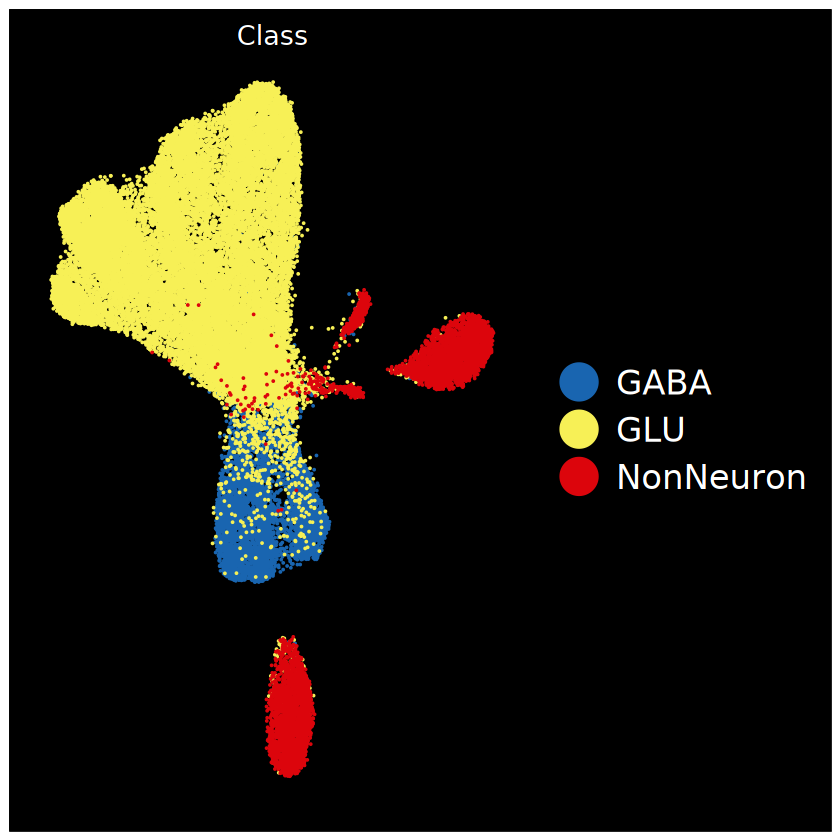

In [ ]:
psrtg1 = DimPlot(srtt,reduction = 'umap',label = T,repel=TRUE,
                   label.color = "white",
                   group.by = 'subclass',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("Subclass") +
    theme_presentation() + 
    guides(colour = guide_legend(override.aes = list(size=10))) +
    theme(legend.text = element_text(size = 20)) +
    scale_color_discreterainbow()
  
psrtg2 = DimPlot(srtt,reduction = 'umap',
                   group.by = 'layer',pt.size = 0.01) +
    theme_presentation() +
    guides(colour = guide_legend(override.aes = list(size=10))) +
    theme(legend.text = element_text(size = 20)) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("Layer") +
    scale_color_discreterainbow()
  
psrtg3 = DimPlot(srtt,reduction = 'umap',
                   group.by = 'class',pt.size = 0.01) +
    theme_presentation() +
    guides(colour = guide_legend(override.aes = list(size=10))) +
    theme(legend.text = element_text(size = 20)) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("Class") +
    scale_color_discreterainbow()
psrtg3
ggexport(psrtg1+psrtg2+psrtg3,filename = "result/figure3/metacell_n10_umap_cluster_genecounts_with_ont-ngs-24_12_05.pdf",
           width = 25, height = 8)

#### Add isoform information

In [ ]:
fsraw.cor = fsraw.cor[fsraw.cor$class != "" & fsraw.cor$layer %in% paste0("l",1:6),]
fsraw.cor$metacell = cellanuq[match(fsraw.cor$cell_id,cellanuq$cell_id),]$metacell
transct = fsraw.cor %>% group_by(metacell,gene_id,transcript_id) %>% 
    summarise(count = length(readid))
transct = transct[!is.na(transct$metacell),]
transct.st = transct %>% group_by(transcript_id) %>%summarise(count = sum(count))
nrow(transct.st)
transct.st = transct.st[transct.st$count > 50,]
nrow(transct.st)

transct = transct[transct$metacell %in% cellanuq$metacell & transct$transcript_id %in% transct.st$transcript_id,]
transct$transcript_id = paste0(transct$gene_id,"|",transct$transcript_id)
transmx = dcast.data.table(setDT(transct), transcript_id~metacell, value.var = "count", fun.aggregate = sum)
transmx = as.data.frame(transmx);rownames(transmx) = transmx$transcript_id;transmx = transmx[,-1]
#isomx = qread("data/meta_cell_ngs/nano_isoform_count_mx_metacell_n10_st_24_03_28.qs")
qsave(transmx,file = "data/meta_cell_ngs/nano_isoform_cell_st_metacell_n10_mx_25_12_03.qs")

DefaultAssay(srtt)
srtt[['ISOFORM']] = CreateAssayObject(transmx[,colnames(srtt)])
DefaultAssay(srtt) = "ISOFORM"
srtt = NormalizeData(srtt)
srtt = ScaleData(srtt)
DefaultAssay(srtt) = "RNA"
qsave(srtt,file = "data/meta_cell_ngs/umap_srt_combined_with_isoform_25_12_03.qs")

[1] "RNA"

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have pipe characters ('|'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have pipe characters ('|'), replacing with dashes ('-')"
Warning message:
"Different cells and/or features from existing assay ISOFORM"
Centering and scaling data matrix



In [ ]:
transmxf = transmx[rowSums(transmx > 0 )>(ncol(transmx)/100),colnames(genemxf)]
srttc = ProcessSrtUmapSingle(rbind(genemxf,transmxf),cellidan)

DimPlot(srttc,label = T,label.color = "white",repel=TRUE,
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
DimPlot(srtt,label = T,label.color = "white",repel=TRUE,
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
#single cell test
fsraw = fsraw[fsraw$class != "" & fsraw$layer %in% paste0("l",1:6),]
cellids = unique(fsraw$cell_id)
cellids.sample = sample(cellids, replace = FALSE,20000)
fsraw.test = fsraw[fsraw$cell_id %in% cellids.sample,]
fsraw.test$metacell = paste0(fsraw.test$class,"-",fsraw.test$subclass,"-",fsraw.test$layer,"-",fsraw.test$region,"-",fsraw.test$cell_id)
genect.test = fsraw.test %>% group_by(metacell,gene_id) %>% 
    summarise(count = length(readid))

cellanuq.down = unique(fsraw.test[,c("cell_id","metacell")])
ngscount.test = ngscount[ngscount$cell_label %in% cellids.sample,]
ngscount.test$metacell = cellanuq.down[match(ngscount.test$cell_label,cellanuq.down$cell_id),]$metacell
genect.ngs.test = ngscount.test %>% group_by(metacell,gene) %>% 
    summarise(count = sum(umi_count))
colnames(genect.ngs.test)[2] = "gene_id"
genectt.test = rbind(genect.test,genect.ngs.test)
genectt.test = genectt.test %>% group_by(metacell,gene_id) %>% summarise(count = sum(count))
summary(genectt.test$count)
genectt.test = genectt.test[genectt.test$gene_id %in% genectt.test$gene_id,]
#genemx = tidyr::spread(genectt, key = metacell, value = count, fill = 0)
genemx.test = dcast.data.table(setDT(genectt.test), gene_id~metacell, value.var = "count", fun.aggregate = sum)
genemx.test = as.data.frame(genemx.test);rownames(genemx.test) = genemx$gene_id;genemx.test = genemx.test[,-1]
qsave(genemx.test,file = "data/meta_cell_ngs/total_gene_cell_st_metacell_n1_mx_downsample_24_10_23.qs")
srtt.down = ProcessSrtUmapSingle(genemx.test,cellidan)

DimPlot(srtt.down,label = T,label.color = "white",repel=TRUE,
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
# cellidan = data.frame("metacell" = colnames(genemx))
# cellidan$class = MySplit(cellidan$metacell,"-",1)
# cellidan$subclass = MySplit(cellidan$metacell,"-",2)
# cellidan$layer = MySplit(cellidan$metacell,"-",3)
# cellidan$areaid = MySplit(cellidan$metacell,"-",4)
# colnames(cellidan)[1] = "cell_id"
# qsave(cellidan,file = "data/meta_cell_ngs/metacell_annotation_n10_24_08_25.qs")
cellidan = qread("data/meta_cell_ngs/metacell_annotation_n5_24_08_25.qs")

In [ ]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
srtt[["percent.mt"]] <- PercentageFeatureSet(srtt, pattern = "^MT-")
# Visualize QC metrics as a violin plot
VlnPlot(srtt, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,idents = NULL)

In [ ]:
Exmatrix = function(genect){
    genemx.fl = tidyr::spread(genect, key = metacell, value = count, fill = 0)
    genemx.fl = as.data.frame(genemx.fl)
    rownames(genemx.fl) = genemx.fl$gene_id;genemx = genemx[-1]
    genemx.fl = genemx.fl[,cellidanf$cell_id]
    return(genemx.fl)
}
genemx.fl = Exmatrix(genect)
# genemx.flf = genemx.fl[rowSums(genemx.fl > 0 )>(ncol(genemx.fl)/100),
#                    colSums(genemx.fl > 0) > 500]
dim(genemx.flf)
srtt.fl = ProcessSrtUmapSingle(genemx.fl,cellidan)


genemx.ngs = Exmatrix(genect.ngs)
genemx.ngsf = genemx.ngs[rowSums(genemx.ngs > 0 )>(ncol(genemx.ngs)/100),
                   colSums(genemx.ngs > 0) > 500]
dim(genemx.ngsf)
srtt.ngs = ProcessSrtUmapSingle(genemx.ngsf,cellidan)


In [ ]:
DimPlot(srtt.fl,label = T,label.color = "white",
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

DimPlot(srtt.ngs,label = T,label.color = "white",
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

DimPlot(srtt,label = T,label.color = "white",
        group.by = 'subclass',
        pt.size = 0.01) +
    ggtitle("Subclass") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
transids = unique(transct$transcript_id)
transids1 = transids[1:as.integer(length(transids)/2)]
transids2 = transids[as.integer(length(transids)/2):length(transids)]
isomx1 = dcast.data.table(setDT(transct[transct$transcript_id %in% transids1,]), transcript_id~metacell,  value.var = "count",fill = 0)
isomx1 = as.data.frame(isomx1)
rownames(isomx1) = isomx1$transcript_id;isomx1 = isomx1[-1]

isomx2 = dcast.data.table(setDT(transct[transct$transcript_id %in% transids2,]), transcript_id~metacell,  value.var = "count",fill = 0)
isomx2 = as.data.frame(isomx2)
rownames(isomx2) = isomx2$transcript_id;isomx2 = isomx2[-1]
cmd = intersect(colnames(isomx2),colnames(isomx1))
isomx = rbind(isomx1[,cmd],isomx2[,cmd])
qsave(isomx,"data/meta_cell_ngs/nano_isoform_metacell_n10_mx_24_08_25.qs")

genemx = dcast.data.table(setDT(genect), gene_id~metacell,  value.var = "count",fill = 0)
genemx = as.data.frame(genemx)
rownames(genemx) = genemx$gene_id;genemx = genemx[-1]
qsave(genemx,"data/meta_cell_ngs/nano_gene_metacell_n10_mx_24_08_25.qs")

In [ ]:
srtg = ProcessSrtUmapSingle(genemx,cellidan)
srti = ProcessSrtUmapSingle(isomx,cellidan)

qsave(srtg,"data/meta_cell_ngs/nano_gene_metacell_n10_srt_24_08_25.qs")
qsave(srti,"data/meta_cell_ngs/nano_isoform_metacell_n10_srt_24_08_25.qs")

In [ ]:
DimPlot(srtg,group = "layer")
DimPlot(srti,group = "layer")

In [ ]:
#try n20
genemx = GetAssayData(srtt,"RNA")
genemx = as.data.frame(genemx)
genemx$gene_id = rownames(genemx)
genedf = melt(genemx)
head(genedf)

In [ ]:
genedf = genedf[genedf$value != 0,]
genedf$variable = as.character(genedf$variable)
genedf$clusterid = as.numeric(MySplit(genedf$variable,"-",5))
genedf$class = MySplit(genedf$variable,"-",1)
genedf$subclass = MySplit(genedf$variable,"-",2)
genedf$layer = MySplit(genedf$variable,"-",3)
genedf$region = MySplit(genedf$variable,"-",4)
genedf$clusterid2 = as.integer(genedf$clusterid/2)
qsave(genedf,"data/meta_cell_ngs/total_isoform_metacell_gene_n10_24_11_12.qs")
genedf$metacell = paste0(genedf$class,"-",genedf$subclass,"-",genedf$layer,"-",genedf$region,"-",genedf$clusterid2)

In [ ]:
genedf = genedf %>% group_by(metacell,gene_id) %>% summarise(count = sum(value))
genemx = dcast.data.table(setDT(genedf), gene_id~metacell, value.var = "count", fun.aggregate = sum)
genemx = as.data.frame(genemx);rownames(genemx) = genemx$gene_id;genemx = genemx[,-1]
dim(genemx)
#genemxf = genemx[, colSums(genemx > 0) > 1000]
srtt.n20 = ProcessSrtUmapSingle(genemx)


In [ ]:
DimPlot(srtt.n20,reduction = 'umap',label = T,repel=TRUE,
                   label.color = "white",
                   group.by = 'subclass',pt.size = 0.01) +
    # group.by = 'wsnn_res.0.3') + 
    ggtitle("layer") +
    theme_presentation() +
    scale_color_discreterainbow()

In [ ]:
cellanuq = qread("ref/cellball_annotation_n10_24_10_24.qs")
head(cellanuq)
#srtt = qread("data/meta_cell_ngs/umap_srt_combined_24_03_28.qs")
genemx = qread("data/meta_cell_ngs/ngs_gene_cell_st_metacell_n10_mx_24_03_28.qs")

In [ ]:
#fsrawdp = fsrawdp[fsrawdp$class != "",]
#fsrawdp$metacell = cellanuq[match(fsrawdp$cell_id,cellanuq$cell_id),]$metacell
bedids.info = qread("data/reads_full_anotation/fullscope_bed_read_block_info_09_11.qs")
bedids.infof = bedids.info[bedids.info$layer %in% paste0("l",1:6) & !is.na(bedids.info$subclass),]
bedids.infof$splice = "unspliced"
bedids.infof[bedids.infof$rblockn > 1,]$splice = "spliced"

### Case plot funtion

In [12]:
#case plot
BuildPlotBed = function(npclf,nanobed,groupname,geneex,sigtr = NULL){
    readgroup = npclf[npclf$gene_id == geneex,]
    # readgroup = readgroup[readgroup$arealayer %in% paste0("l",1:6),]
    readgroup = unique(readgroup[c("readid","transcript_id","gene_id",
                                   groupname)])
    # readgroup = readgroup %>% group_by(readid) %>% 
    #   mutate(transgroup = 
    #            paste(unique(transcript_id)[order(unique(transcript_id))],
    #                              collapse = "|"))
    readgrt = nanobed[nanobed$name %in% readgroup$readid,]
    readgrt$group = readgroup[match(readgrt$name,
                                    readgroup$readid),
                              groupname]
    # readgrt$transcript_id = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transcript_id"]
    # readgrt$transgroup = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transgroup"]
    
    grtdfl = as.data.frame(readgrt)
    colnames(grtdfl)[ncol(grtdfl)] = "group"
    colnames(grtdfl)[6] = "readid"
    grtdfl = merge(grtdfl,readgroup[c("readid",
                              "transcript_id")],
          by = "readid")
    grtdfl = grtdfl[order(grtdfl$transcript_id,
                          grtdfl$start,grtdfl$end),]
    grtdfl = grtdfl[!is.na(grtdfl$group) &
                      grtdfl$group != "",]
    grtdfl
    grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
    grtdfl = grtdfl %>% group_by(group) %>% 
      mutate(orid = as.numeric(factor(readord,
                                      levels = unique(readord)))) %>%
      mutate(oridnorm = orid/max(orid))
    grtdfl$sig = "black"
    grtdfl[grtdfl$group %in% sigtr, "sig"] = "red"
    return(grtdfl)
}

IsoformReadPlot = function(gtfp, grtdfl, geneex, onlyhub = T,mycolor = NULL){
    library(randomcoloR)
    library(ggbio)
    library(ggtranscript)
    tartrans = gtfp[which(gtfp$gene_id == geneex),]
    tartrans = as.data.frame(tartrans)
    tartrans = tartrans[tartrans$type == "exon",]
    tartrans = tartrans[order(tartrans$transcript_id),]
    tartrans$orid = as.numeric(factor(tartrans$transcript_id,levels = unique(tartrans$transcript_id)))
    tartrans$group = NA
    if(onlyhub){
      grtdfl = grtdfl %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
      grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
      grtdfl = grtdfl %>% group_by(group) %>% 
        mutate(orid = as.numeric(factor(readord,
                                        levels = unique(readord)))) %>%
        mutate(oridnorm = orid/max(orid))
      tartrans = tartrans[tartrans$transcript_id %in% grtdfl$transcript_id,]
    }
    # tartrans = merge(tartrans,unique(grtdfl[c("transcript_id",
    #                                           "transgroup")]),
    #                  by = "transcript_id")
    tartranstx = tartrans %>% group_by(transcript_id,orid) %>% 
      summarise(start = min(start),end = max(end))
    tartranstx$group = NA
    mylim = c(min(tartranstx$start)-1000,max(tartranstx$end)+1000)
    library(ggh4x)
    
    #facetcol = list()
    #facetcoldf = unique(grtdfl[c("group","sig")])
    #facetcoldf = facetcoldf[order(facetcoldf$group,decreasing = F),]
    #for (i in 1:nrow(facetcoldf)) {
    #  facetcol[[i]] = element_text(color = facetcoldf[i,]$sig)
    #}
    #facetcol[[nrow(facetcoldf)+1]] = element_text(color = "black")
    grtdflin = to_intron(grtdfl,
                     "readord")
    no_of_colors = length(unique(grtdfl$transcript_id)) 
    colorful_palette = distinctColorPalette(no_of_colors) 
    names(colorful_palette) = unique(grtdfl$transcript_id)
    if(!is.null(mycolor)){
        colorful_palette = mycolor
    }

    
    pc = ggplot(grtdfl,aes(x = start,xend = end,
                      y = orid,
                      yend = orid,
                      fill = transcript_id,color = transcript_id)) +
      geom_segment(size = 0.5) +
      geom_segment(data = grtdflin,
                   aes(x = start,xend = end,
                       y = orid,
                       yend = orid),
                   size = 0.03,alpha = 0.5,color = "grey") +
      geom_range(data = tartrans,
                 aes(xstart = start,xend = end,
                     y = orid,
                     fill = transcript_id,color = transcript_id),
                 size = 0.2) +
      geom_intron(data = to_intron(tartrans,
                                   "transcript_id"),
                  aes(xstart = start,xend = end,strand = strand),
                  size = 0.2,
                  arrow.min.intron.length = 200,
                  arrow = arrow(length=unit(0.3,"cm"))) +
      geom_text(data = tartranstx,
                aes(x = (start + end) / 2,y = orid,
                    label = transcript_id),
                size = 3, vjust = -0.1, color = "black") +
     # facet_grid2(group~.,scales = "free",
     #             strip = strip_themed(
     #               text_y = facetcol
    #            )) +
      facet_wrap(group~.,scales = "free",ncol = 1,strip.position = "top") +
      scale_x_continuous(limits = mylim)+
      scale_color_manual(values = colorful_palette) +
      scale_fill_manual(values = colorful_palette) +
      # scale_fill_discreterainbow() +
      # scale_color_discreterainbow() +
      theme_void() + 
      ggtitle(geneex) +
      theme(legend.position = "none",
            panel.spacing = unit(0,'lines'),
            strip.background = element_rect(fill = NA,color = NA),
           strip.placement = "outside",
           plot.title = element_text(hjust = 0.5))
    pc
    
    return(pc)
}
#fsraw.cor = fsraw[fsraw$layer %in% paste0("l",1:6),]
#
IsoformReadPlotTotal = function(fsraw,isosigi,longbed,gtf,geneex,hubtrans = NULL,onlyhub = F,mycolors =NULL){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    if(is.null(mycolors)){
        mycolors = distinctColorPalette(length(transname))
        names(mycolors) = transname
    }
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub,mycolors)
    pci1
    return(pci1)
}

CaseCountPlotBox = function(fsraw,geneex,transname,mycolors = NULL){
    npcase1 = fsraw[fsraw$gene_id == geneex,]
    npcase1 = npcase1[npcase1$transcript_id %in% transname,]
    if(is.null(mycolors)){
        mycolors = distinctColorPalette(length(unique(npcase1$transcript_id)))
    }
    npcase1 = npcase1 %>% 
        group_by(areatr,chunk) %>%
        mutate(genecount = length(unique(readid))) %>% 
        filter(genecount > 10) %>%
        group_by(areatr,chunk,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
    npcase1 = npcase1[npcase1$areatr != "",]
    
    npcase1$rate = npcase1$count/npcase1$genecount

    npcase1$transid = as.numeric(as.factor(npcase1$transcript_id))
    npcase1$cmpgroup = paste0(substr(npcase1$transid,1,1),
                            "-",npcase1$areatr)
    comparisons = list()
    classid = as.character(unique(npcase1$areatr))
    n = 1
    for(i in 1:length(classid)){
        for(j in (i+1):length(classid)){
            comparisons[[n]] = c(classid[i],classid[j])
            n = n + 1
        }
    }
    
    npcase1m = npcase1 %>% group_by(areatr,transcript_id) %>% summarise(mean = mean(rate))
    
    pci2 = ggplot(npcase1,
                  aes(x = areatr, y = rate, color = transcript_id)) +
      geom_boxplot() +
      geom_point(data = npcase1m,aes(x = areatr, y = mean,
                                    color = transcript_id),
                 position = position_dodge(0.75)) +
      # geom_line(data = npcase1m,aes(x = areatr, y = mean,
      #                              group = transcript_id),
      #           position = position_dodge(0.75)) +
      stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.7,ref.group = ".all.") + 
      scale_color_manual(values = mycolors) +
      theme_pubr() + 
    theme(axis.text.x = element_text(angle = 45,vjust = 0.5)) +
    xlab("") + ylab("Isoform read ratio")
    return(pci2)
}

CasePlotTotalClass = function(fsraw,isosigi,gtf,geneex,hubtrans = NULL,markdfb,edgesdf){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    mycolors = distinctColorPalette(length(transname))
    print(mycolors)
    names(mycolors) = transname
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    print(head(grtdfl))
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolors)
    pci1
#ggexport(p0c1,filename = "processed/figures/f3/bambu_cell_case_NNvsNeuron_CDC42.pdf",
#           width = 6,height = 5)

    npcase1 = fsraw[fsraw$gene_id == geneex,]
    npcase1 = npcase1 %>% 
        group_by(areatr,chunk) %>%
        mutate(genecount = length(unique(readid))) %>% 
        filter(genecount > 10) %>%
        group_by(areatr,chunk,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
    npcase1 = npcase1[npcase1$areatr != "",]
    npcase1 = npcase1[npcase1$transcript_id %in% transname,]
    npcase1$rate = npcase1$count/npcase1$genecount

    npcase1$transid = as.numeric(as.factor(npcase1$transcript_id))
    npcase1$cmpgroup = paste0(substr(npcase1$transid,1,1),
                            "-",npcase1$areatr)
    comparisons = list()
    classid = as.character(unique(npcase1$areatr))
    n = 1
    for(i in 1:length(classid)){
        for(j in (i+1):length(classid)){
            comparisons[[n]] = c(classid[i],classid[j])
            n = n + 1
        }
    }


    
    npcase1m = npcase1 %>% group_by(areatr,transcript_id) %>% summarise(mean = mean(rate))
    
#library(ggstatsplot)

    pci2 = ggplot(npcase1,
                  aes(x = areatr, y = rate, color = transcript_id)) +
      geom_boxplot() +
      geom_point(data = npcase1m,aes(x = areatr, y = mean,
                                    color = transcript_id),
                 position = position_dodge(0.75)) +
      geom_line(data = npcase1m,aes(x = areatr, y = mean,
                                   group = transcript_id),
                position = position_dodge(0.75)) +
      stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.7,ref.group = ".all.") + 
      scale_color_manual(values = mycolors) +
      theme_pubr() + xlab("") + ylab("Isoform read ratio")
    
#     pci2 = ggbarplot(npcase1,
#                     x = "areatr", y = "rate", 
#                     fill = "areatr",size = 0.5,
#                     width = 0.7,facet.by = "transcript_id",
#                     add = c("mean_se")) +
#         geom_jitter(data = npcase1,
#                 aes(x = areatr, y = rate),size = 0.3,
#                     width = 0.25) +
#         scale_fill_flatui() +
# #        scale_fill_manual(values = mycolors) +
#         stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.7,
#                            ref.group = ".all.") + 
#         xlab("") + ylab("Isoform ratio") + labs(fill = "") +
#         theme_pubr() + 
#     theme(axis.text.x = element_blank(),
#          axis.ticks.x = element_blank(),
#           legend.position = "bottom")
#     pci2
    pci3 = MarkerSpPlot(fsraw.cor,markdfb,geneex,hubtrans,edgesdf,200)
    #pci3 = MarkerSpPlot(fsrawdp.cell,fsrawdp.cellb,geneex,mycolors,hubtrans)
    
    pci = ggarrange(ggarrange(pci1,pci2,widths = c(1.5,2),ncol = 1),pci3,nrow = 1)
    return(pci)
}


In [13]:
#
CasePlotTotalClass = function(fsraw,isosigi,gtf,geneex,srtt,hubtrans = NULL){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    mycolors = distinctColorPalette(length(transname))
    #print(mycolors)
    names(mycolors) = transname
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    #print(head(grtdfl))
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolors)
    pci1
#ggexport(p0c1,filename = "processed/figures/f3/bambu_cell_case_NNvsNeuron_CDC42.pdf",
#           width = 6,height = 5)

    npcase1 = fsraw[fsraw$gene_id == geneex,]
    npcase1 = npcase1 %>% 
        group_by(areatr,chunk) %>%
        mutate(genecount = length(unique(readid))) %>% 
        filter(genecount > 10) %>%
        group_by(areatr,chunk,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
    npcase1 = npcase1[npcase1$count > 5,]
    npcase1 = npcase1[npcase1$areatr != "",]
    npcase1 = npcase1[npcase1$transcript_id %in% transname,]
    npcase1$rate = npcase1$count/npcase1$genecount

    npcase1$transid = as.numeric(as.factor(npcase1$transcript_id))
    npcase1$cmpgroup = paste0(substr(npcase1$transid,1,1),
                            "-",npcase1$areatr)
    comparisons = list()
    classid = as.character(unique(npcase1$areatr))
    n = 1
    for(i in 1:length(classid)){
        for(j in (i+1):length(classid)){
            comparisons[[n]] = c(classid[i],classid[j])
            n = n + 1
        }
    }
    
    pci2 = ggbarplot(npcase1,
                    x = "areatr", y = "rate", 
                    fill = "areatr",size = 0.5,
                    width = 0.7,facet.by = "transcript_id",
                    add = c("mean_se")) +
        geom_jitter(data = npcase1,
                aes(x = areatr, y = rate),size = 0.3,
                    width = 0.25) +
        scale_fill_flatui() +
#        scale_fill_manual(values = mycolors) +
        stat_compare_means(label = "p.signif",hide.ns = T,method = "t.test",vjust = 0.5,
                           comparisons = list(c("GABA","GLU"),c("GABA","NonNeuron"),c("GLU","NonNeuron"))) + 
        xlab("") + ylab("Isoform ratio") + labs(fill = "") +
        theme_pubr() + 
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank(),
          legend.position = "bottom")
    pci2

    featurei = gsub(transname,pattern = "_",replacement = "-")
    featurei = paste0(geneex,"-",featurei)
    pci3 = list()
    DefaultAssay(srtt) = "ISOFORM"
    isodf = GetAssayData(srtt,assay = "ISOFORM")
    umapdf = as.data.frame(srtt@reductions$umap@cell.embeddings)
    for(i in 1:length(featurei)){
        # library(ggpointdensity)
        isodfi = isodf[featurei[i],]
        isodfi1 = names(isodfi[isodfi>0])
        umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
        umapdf.plot = umapdf[isodfi1,]
        pci3i = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.2) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(featurei[i]) + coord_fixed()
        # pci3i = plot_density(srtt,features = featurei[i],
        #             pal = "magma",size = 0.2,reduction = "umap") + NoLegend() +
        # ggtitle(featurei[i]) + theme_void() + coord_fixed()
        pci3[[i]] = pci3i
    }
    pci3 = ggarrange(plotlist = pci3,common.legend = T,legend = "bottom")
    pci = ggarrange(ggarrange(pci1,pci2,widths = c(1.5,1),ncol = 1),pci3,nrow = 1,widths = c(1,1))
    return(pci)
}


In [14]:
MarkerSpPlot = function(npclfdp.cell,npclfdp.cellb,geneex,mycolor = NULL,hubtrans = NULL){
    markdf = npclfdp.cell[npclfdp.cell$gene_id %in% geneex,]
    if(!is.null(hubtrans)){
        markdf = markdf[markdf$transcript_id %in% hubtrans,]
    }
    markdfb = npclfdp.cellb[!npclfdp.cellb$cell_id %in% markdf$cell_id,]
    markdf = markdf %>% group_by(cell_id,gene_id) %>% mutate(readrate = readnum/sum(readnum))
    markdf = markdf[markdf$readrate > 0.5,]
    markdfst = markdf %>% group_by(transcript_id) %>% summarise(cellnum = length(cell_id))
    markdfst$cellpop = markdfst$cellnum/sum(markdfst$cellnum)
    markdfst = markdfst[markdfst$cellpop > 0.01,]
    markdf = markdf[markdf$transcript_id %in% markdfst$transcript_id,]

    if(is.null(mycolor)){
        mycolor = distinctColorPalette(length(unique(markdf$transcript_id)))
    }
    
    pmkpti = ggplot() +
      scattermore::geom_scattermore(
        data = markdfb,
        aes(x,y),
        color = "white",
        # pixels = raster.dpi,
        pointsize = 0.05
      ) +
      geom_point(data = markdf,
                 aes(x,y,color = transcript_id,size = readnum)) + 
      scale_size(range = c(0.05,0.1)) +
      # facet_wrap(~gene_id,nrow = 2) +
      theme_void() + 
      scale_color_manual(values = mycolor) +
      theme_presentation() + 
      theme(legend.position = "top",legend.title = element_blank(),
            legend.text = element_text(size = 6)) +
      guides(color = guide_legend(override.aes = list(size=4),
                                  nrow = 2),
            size = "none") +
      scale_y_reverse() + scale_x_reverse()
    pmkpti
    return(pmkpti)
}

### Isoform diversity analysis

In [7]:
ReadIsoNumRandom = function(npclfglu,n = 500,mygroup){
    readids = unique(npclfglu$readid)
    readid1 = readids[sample(1:length(readids),n)]
    transt1 = npclfglu[npclfglu$readid %in% readid1,]
    transt1 = transt1[order(transt1$readid,transt1$gene_id,
                            transt1$transcript_id),]
    transt1 = transt1[!duplicated(transt1[c("readid","gene_id")]),]
    
    transt1 = transt1 %>% group_by(gene_id) %>% 
      summarise(transnum = length(unique(transcript_id)),
                readnum = length(unique(readid)))
    transt1f = transt1[transt1$readnum > 1,]
    median(transt1f$transnum)
    
    resdf = data.frame("mison" = mean(transt1f$transnum),
                       "isot" = sum(transt1$transnum),
                       "genet" = nrow(transt1),
                       "readnum" = n,
                       "group" = mygroup)
    
    return(resdf)
  }

groupanid = unique(subclst[subclst$readnum > 100000,]$subclass)
groupanid = groupanid[groupanid != ""]
fsrawdpls = list()
for (i in 1:length(groupanid)) {
    fsrawdpls[[i]] = fsraw.cor[fsraw.cor$subclass == groupanid[i],]
}
names(fsrawdpls) = groupanid
  
k = 100000
cellrdsto = NULL
for (i in 1:100) {
    print(i)
    for (j in 1:length(fsrawdpls)) {
      cellrdti = ReadIsoNumRandom(fsrawdpls[[j]],k,names(fsrawdpls)[j])
      cellrdsto = rbind(cellrdsto,cellrdti)
    }
}
qsave(cellrdsto,"result/figure3/bambu_subclass_isoform_diversity_cmp_25_10_11.qs")
#groupanid = unique(subclst[subclst$readnum > 1000000,]$class)
groupanid = unique(cellan$class)
groupanid
fsrawdpls = list()
for (i in 1:length(groupanid)) {
    fsrawdpls[[i]] = fsraw.cor[fsraw.cor$class == groupanid[i],]
}
names(fsrawdpls) = groupanid
  
k = 1000000
cellrdsto2 = NULL
for (i in 1:100) {
    print(i)
    for (j in 1:length(fsrawdpls)) {
      cellrdti = ReadIsoNumRandom(fsrawdpls[[j]],k,names(fsrawdpls)[j])
      cellrdsto2 = rbind(cellrdsto2,cellrdti)
    }
}
qsave(cellrdsto2,"result/figure3/bambu_class_isoform_diversity_cmp_25_10_11.qs")



ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'unique': object 'subclst' not found


In [ ]:
fsraw.cor$areatr = fsraw.cor$class
CellIsoNumRandom = function(fsraw.cor,n = 100,time = 10){
    areatrs = unique(fsraw.cor$areatr)
    cellrdsto = NULL
    for (i in 1:length(areatrs)) {
        fsrawi = fsraw.cor[fsraw.cor$areatr == areatrs[i],]
        cellids = unique(fsrawi$cell_id)
        if(length(cellids) < n) next;
        for (j in 1:time) {
            cellid.down = cellids[sample(1:length(cellids),n)]
            fsrawij = fsrawi[fsrawi$cell_id %in% cellid.down,]
            transtj = fsrawij %>% group_by(gene_id) %>% 
                summarise(transnum = length(unique(transcript_id)),
                readnum = length(unique(readid)))
            #transtjf = transtj[transtj$readnum > 1,]
            cellrdti = data.frame("mison" = mean(transtj$transnum),
                       "isot" = sum(transtj$transnum),
                       "genet" = nrow(transtj),
                       "cellnum" = n,
                       "group" = areatrs[i])
            cellrdsto = rbind(cellrdsto,cellrdti)
        }
    }
    
    return(cellrdsto)
}


In [ ]:
fsraw.cor$areatr = fsraw.cor$class
cellrdsto2 = CellIsoNumRandom(fsraw.cor,n = 10000,time = 100)
cellrdsto2$group = factor(cellrdsto2$group,levels = c("GLU","GABA","NonNeuron"))
pt1 = ggplot(cellrdsto2,aes(x = group, y = mison, fill = group))+
      geom_jitter(aes(fill = group),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA,linewidth = 0.3) +
      stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
                     ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) + ylab("Isoform diversity per 10000 cells") + xlab("")

  
  pt2 = ggplot(cellrdsto2,aes(x = group, y = isot, fill = group))+
      geom_jitter(aes(fill = group),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA,linewidth = 0.3) +
      stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
                     ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) + ylab("Isoform number per 10000 cells") + xlab("")

  
  pt3 = ggplot(cellrdsto2,aes(x = group, y = genet, fill = group))+
      geom_jitter(aes(fill = group),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA,linewidth = 0.3) +
      stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
                     ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) + 
ylab("Gene number per 10000 cells") + xlab("")


file saved to result/figure3/class_isoform_diversity_cmp_box_25_10_11.pdf



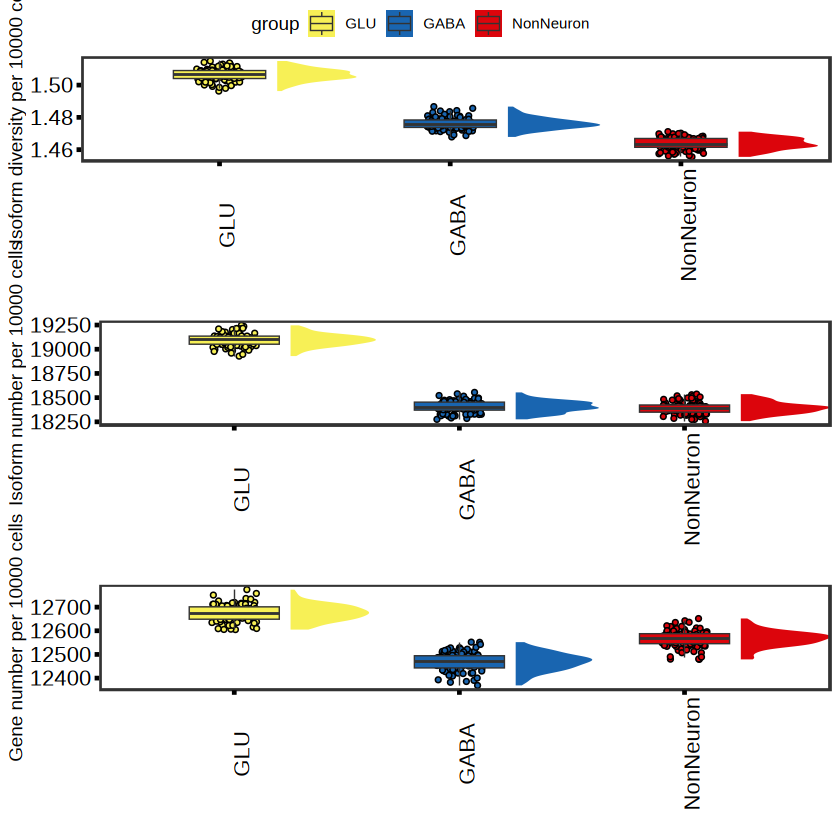

In [48]:
p1.3 = ggarrange(pt1,pt2,pt3,common.legend = T,ncol = 1)
p1.3
qsave(cellrdsto2,"result/figure3/bambu_class_isoform_diversity_cmp_25_10_11.qs")
ggexport(p1.3,filename = "result/figure3/class_isoform_diversity_cmp_box_25_10_11.pdf", width = 2,height = 10)

In [44]:
fsraw.cor$areatr = fsraw.cor$subclass
cellrdsto = CellIsoNumRandom(fsraw.cor,n = 500,time = 100)
cellrdsto$class = cellan[match(cellrdsto$group,cellan$subclass),]$class
cellrdsto = cellrdsto[order(cellrdsto$class),]
cellrdsto$group = factor(cellrdsto$group,levels = suborder)
cellrdsto$class = factor(cellrdsto$class,levels = c("GLU","GABA","NonNeuron"))


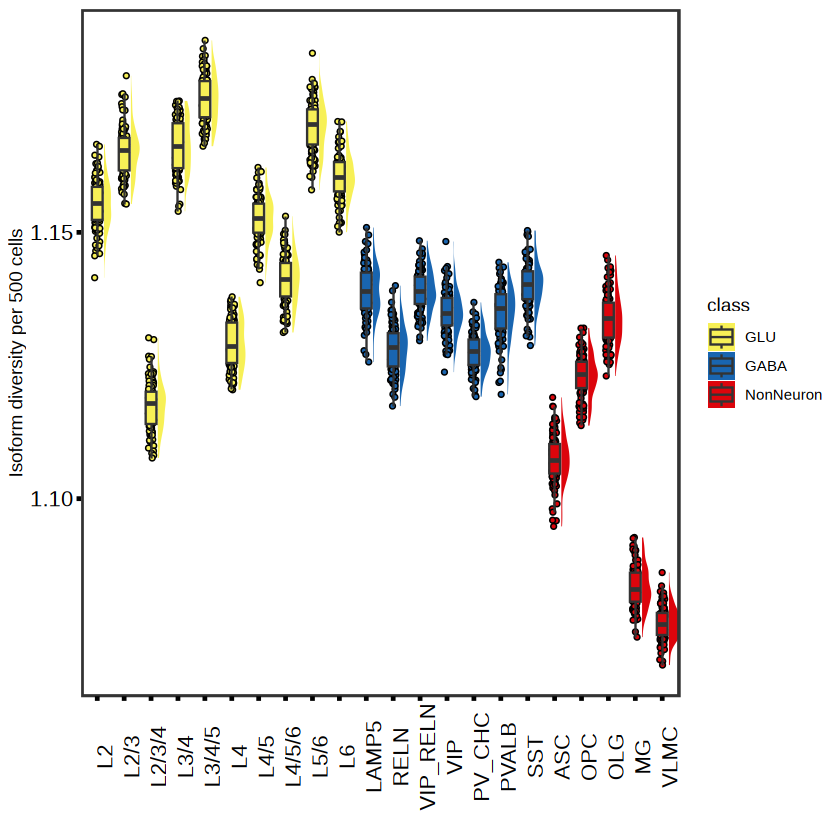

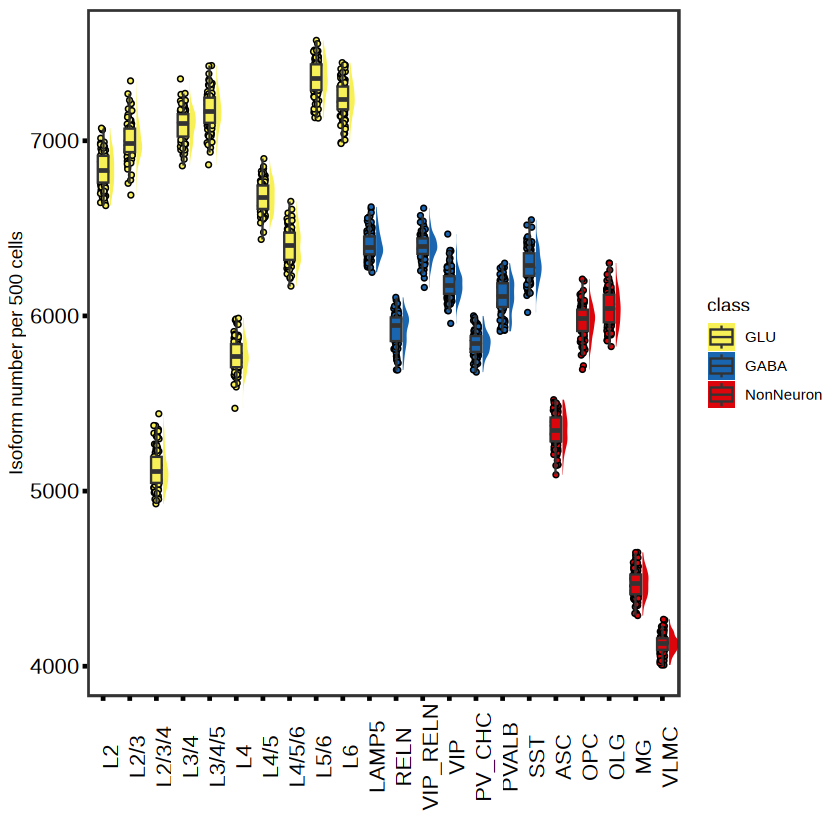

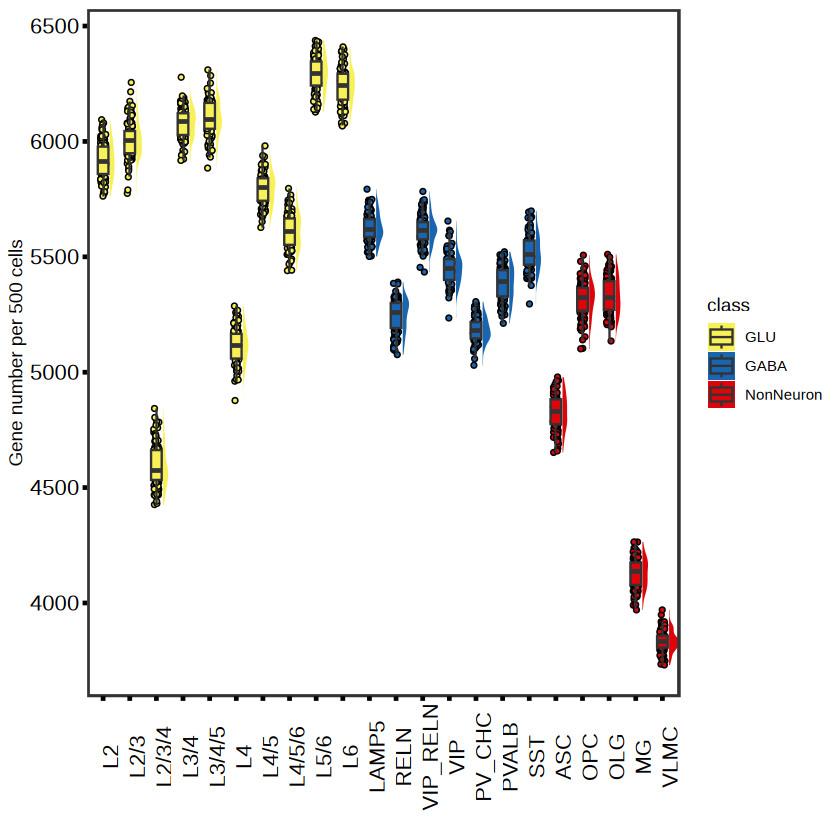

file saved to result/figure3/subclass_isoform_diversity_cmp_box_25_10_11.pdf



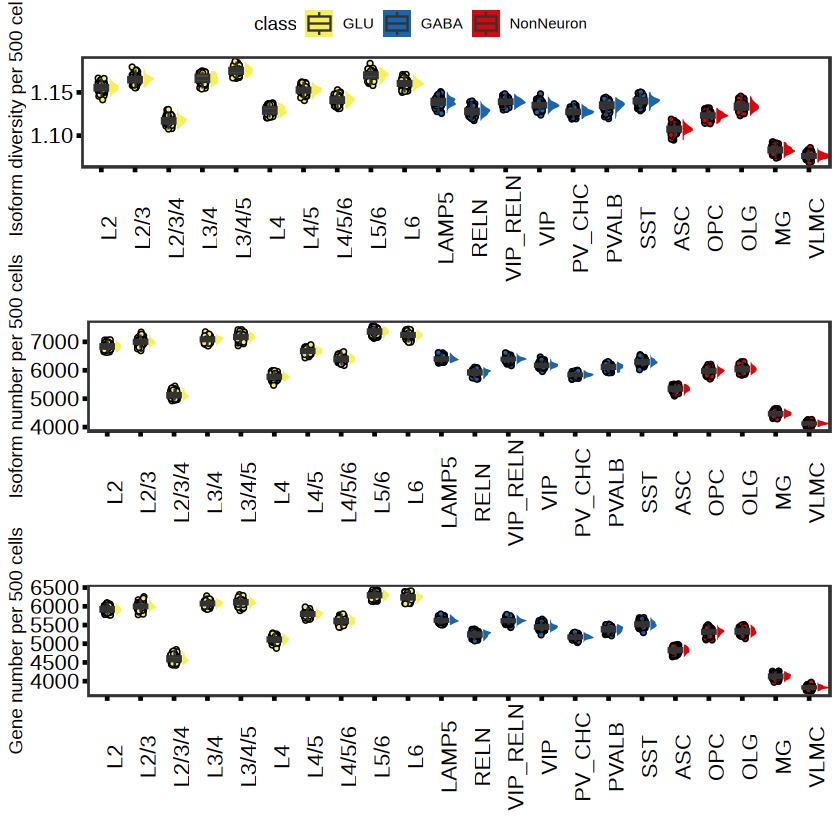

In [45]:
pt1 = ggplot(cellrdsto,aes(x = group, y = mison, fill = class))+
      geom_jitter(aes(fill = class),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA) +
      # stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
      #                ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) +  ylab("Isoform diversity per 500 cells") + xlab("")
  pt1
  
  pt2 = ggplot(cellrdsto,aes(x = group, y = isot, fill = class))+
      geom_jitter(aes(fill = class),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA) +
      # stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
      #                ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) +  ylab("Isoform number per 500 cells") + xlab("")
  pt2
  
  pt3 = ggplot(cellrdsto,aes(x = group, y = genet, fill = class))+
      geom_jitter(aes(fill = class),shape=21,size=1,width=0.1) +
      geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+
      geom_boxplot(width=0.4,size=0.5, outlier.color =NA) +
      # stat_compare_means(label = "p.signif", method = "t.test",hide.ns = T,
      #                ref.group = ".all.")  +
      theme_bw()+
      theme(panel.grid = element_blank(),
        panel.border = element_rect(size = 1),
        axis.text.x = element_text(color = "black", size = 13,angle = 90),
        axis.text.y = element_text(color = "black",size = 13),
        axis.ticks = element_line(color="black",linewidth = 1)) +
      scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) +  ylab("Gene number per 500 cells") + xlab("")
  pt3
p1.2 = ggarrange(pt1,pt2,pt3,common.legend = T,ncol = 1)
p1.2
ggexport(p1.2,filename = "result/figure3/subclass_isoform_diversity_cmp_box_25_10_11.pdf", width = 7,height = 12)

### Cell Marker gene isoform feature analysis

#### Subclass Marker genes

In [ ]:
mkls = list()
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "subclass"
mkls$subclass = FindAllMarkers(srtt)
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "class"
mkls$class = FindAllMarkers(srtt)
qsave(mkls,file = "result/figure3/gene_marker_list_cell_24_12_09.qs")

In [8]:
suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')

In [54]:
fsraw.cor$areatr = fsraw.cor$subclass
genetrstfi = fsraw.cor %>% group_by(areatr,gene_id) %>% 
        mutate(readnumt = length(unique(readid))) %>% 
        group_by(areatr,gene_id,transcript_id)  %>% 
        summarise(readnum = length(unique(readid)),
                  readnumt = readnumt[1],
                  readrate = readnum/readnumt)
genetrstfi = genetrstfi %>% group_by(areatr,gene_id) %>% mutate(transnum = length(unique(transcript_id)))

genetrstfi.st = genetrstfi %>% group_by(gene_id,transcript_id) %>% summarise(readnum = sum(readnum))
genetrstfi.st = genetrstfi.st %>% group_by(gene_id) %>% mutate(readrate = readnum/sum(readnum))
nrow(genetrstfi.st)
genetrstfi.st = genetrstfi.st[genetrstfi.st$readrate > 0.05,]
nrow(genetrstfi.st)
genetrstfi = genetrstfi[genetrstfi$transcript_id %in% genetrstfi.st$transcript_id,]

`summarise()` has grouped output by 'areatr', 'gene_id'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'gene_id'. You can override using the
`.groups` argument.


[1] 33979

[1] 25489

In [47]:

# srt.spi = mkgan.subcl$srt.sp
# genetrstfi = mkgan.subcl$genetrstf
# transt.spi = mkgan.subcl$transt.sp
# head(transt.spi)
cellanuq = qread("ref/cellball_annotation_n10_24_10_24.qs")
cellanuq = cellanuq %>% group_by(cell_id) %>% filter(n() == 1)
cellanuq = cellanuq[cellanuq$layer %in% paste0("l",1:6),]
cellanuq = cellanuq[cellanuq$cellnum > 3,]
fsraw.cor$metacell = cellanuq[match(fsraw.cor$cell_id,cellanuq$cell_id),]$metacell

In [95]:
# features = rownames(srtt)
# features = features[MySplit(features,"-",1) %in% mkcase]
fsraw.cor$areatr = fsraw.cor$subclass
fsraw.cor = fsraw.cor %>% group_by(areatr) %>% mutate(metacelln = length(unique(metacell)),readnumt = length(unique(readid)))
mkex = fsraw.cor[fsraw.cor$areatr != "",]
mkex = mkex %>% group_by(areatr,gene_id,transcript_id) %>% 
summarise(metacellp = length(unique(metacell))/metacelln[1],
          readnum = length(unique(readid)),readnumt = readnumt[1],
          readnorm = readnum/readnumt)
mkex = mkex %>% group_by(gene_id,transcript_id) %>% mutate(readnorm = scale(readnorm),cellpnorm = scale(metacellp))
#objp = as.data.frame(srt.spi[["RNA"]]$scale.data)
#objp = objp[features,]
#objp = objp[!is.na(objp),]
#objp$transcript_id = rownames(objp)
#objp = melt(objp)
#objp$gene_id = MySplit(objp$transcript_id,"-",1)
#objp$areatr = MySplit(as.character(objp$variable),"-",1)
#objp = objp %>% group_by(gene_id,areatr,transcript_id) %>% summarise(scalen = mean(value))
#mkls = qread("result/figure2/gene_marker_list_24_03_28.qs")


`summarise()` has grouped output by 'areatr', 'gene_id'. You can override using
the `.groups` argument.


file saved to result/figure3/gene_marker_isoform_heterogeneity_stat_pie_25_11_26.pdf



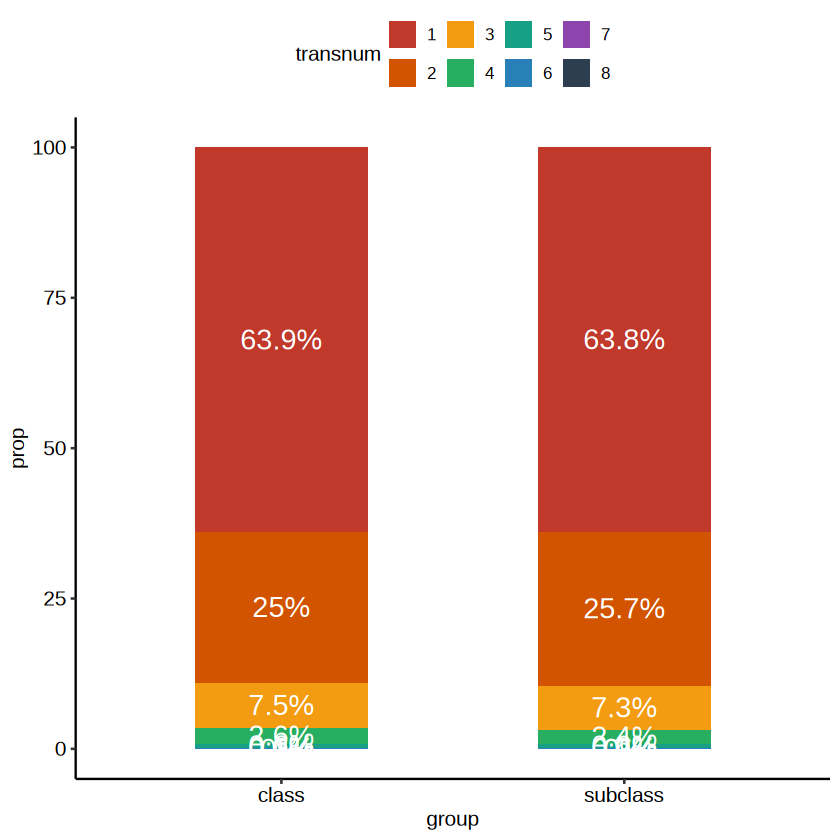

In [55]:
mkls = qread("result/figure3/gene_marker_list_cell_24_12_09.qs")
trannumst = genetrstfi %>% group_by(gene_id) %>% summarise(transnum = length(unique(transcript_id)))
#trannumst
mklsc = mkls$subclass
mklsc = mklsc[mklsc$p_val_adj < 0.05 & mklsc$avg_log2FC > 0.5,]
colnames(mklsc)[7] = "gene_id"
mklsc = merge(mklsc,trannumst,by = "gene_id")
mklsc.st = mklsc%>% group_by(transnum) %>% summarise(genenum = length(unique(gene_id)))
mklsc.st$transnum = as.character(mklsc.st$transnum)
mklsc.st <- mklsc.st %>% 
  arrange(desc(transnum)) %>%
  mutate(prop = genenum / sum(mklsc.st$genenum) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )
mklsc.st$proplabel = paste0(round(mklsc.st$prop,1),"%")
mklsc.st$group = "subclass"

mklc = mkls$class
mklc = mklc[mklc$p_val_adj < 0.05 & mklc$avg_log2FC > 0.5,]
colnames(mklc)[7] = "gene_id"
mklc = merge(mklc,trannumst,by = "gene_id")
mklc.st = mklc %>% group_by(transnum) %>% summarise(genenum = length(unique(gene_id)))
mklc.st$transnum = as.character(mklc.st$transnum)
mklc.st <- mklc.st %>% 
  arrange(desc(transnum)) %>%
  mutate(prop = genenum / sum(mklc.st$genenum) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )
mklc.st$proplabel = paste0(round(mklc.st$prop,1),"%")
mklc.st$group = "class"

mkls.transt = rbind(mklsc.st,mklc.st)

p1.4 = ggplot(mkls.transt, aes(x=group, y=prop, fill=transnum)) +
  geom_bar(stat="identity", width = 0.5, color= NA) +
  #coord_polar("y", start=0) +
  geom_text(aes(y = ypos, label = proplabel), color = "white", size=6) +
  scale_fill_flatui() + theme_pubr()
p1.4
ggexport(p1.4,filename = "result/figure3/gene_marker_isoform_heterogeneity_stat_pie_25_11_26.pdf",width = 4,height = 5)

In [96]:
#mkdfi = genetrstfi[genetrstfi$gene_id %in% c("RORB","IL1RAPL2","ETV1","TLE4","SEMA3E"),]
# #
# mkcase = c("SLC17A7","GPR83","CUX2","PDZD2","CUX1","MYLK","PLCH1","RORB","IL1RAPL2","ETV1","TLE4","SEMA3E","GAD1","GAD2",
# "ADARB2","LAMP5","FBXL7","KIT","EYA4","CALB2","RELN",
#           "VIP","SOX6","DAMTSL1","PVALB","SST","CALB1","SLC1A2","SLC1A3","PTPRZ1","PDGFRA","COL9A1","PLP1","ITGAM","COL1A2")
mkcase = c("SLC17A7","PDZD2","CUX2","MYLK",
           #"BOLA3","SH3BGRL2","CAMK2D",
           "RORB","IL1RAPL2","ETV1","TLE4","SEMA3E",
           "GAD1","LAMP5","FBXL7",
           #"RPH3A",
            "RELN","VIP","SOX6","PVALB","SST","CALB1","SLC1A2","NTRK2","SETD5","DBNDD2",
           "CAPZB","PTN","COL1A2")
suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')
#mkcase = c(mklc[mklc$cluster == areai,]$gene,"VIP")[1:10]
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$meanrelative > 0.05,]
mkdfi = genetrstfi[genetrstfi$gene_id %in% mkcase,]
unique(mkdfi$gene_id)
# mkdfi = mkdfi[mkdfi$transnum == 1 | mkdfi$transcript_id %in% c(isosigi$transcript_id,"XM_005552161.2","XM_005552162.2","XM_005589901.2",
#                      "XM_015431531.1","XM_005573441.2","XM_005567398.2","XM_005545442.2"),]
# unique(mkdfi$gene_id)
mkdfi = merge(mkdfi,mkex,by = c("gene_id","areatr","transcript_id"))
mkdfi = mkdfi[!is.na(mkdfi$areatr),]
mkdfi = mkdfi[mkdfi$areatr %in% suborder & mkdfi$gene_id %in% mkcase,]
#suborder = suborder[suborder %in% mkdfi$areatr]
mkcase = mkcase[mkcase %in% mkdfi$gene_id]
mkdfi$areatr = factor(mkdfi$areatr,levels = rev(suborder))
mkdfi$gene_id = factor(mkdfi$gene_id,levels = mkcase)
mkdfi = mkdfi[!is.nan(mkdfi$readnorm),]

[1] "CALB1"   "CAPZB"   "CUX2"    "DBNDD2"  "GAD1"    "LAMP5"   "NTRK2"  
 [8] "PTN"     "PVALB"   "RORB"    "SLC17A7" "SLC1A2"  "SST"     "VIP"

file saved to result/figure3/subclass_marker_case_plot_25_11_26.pdf



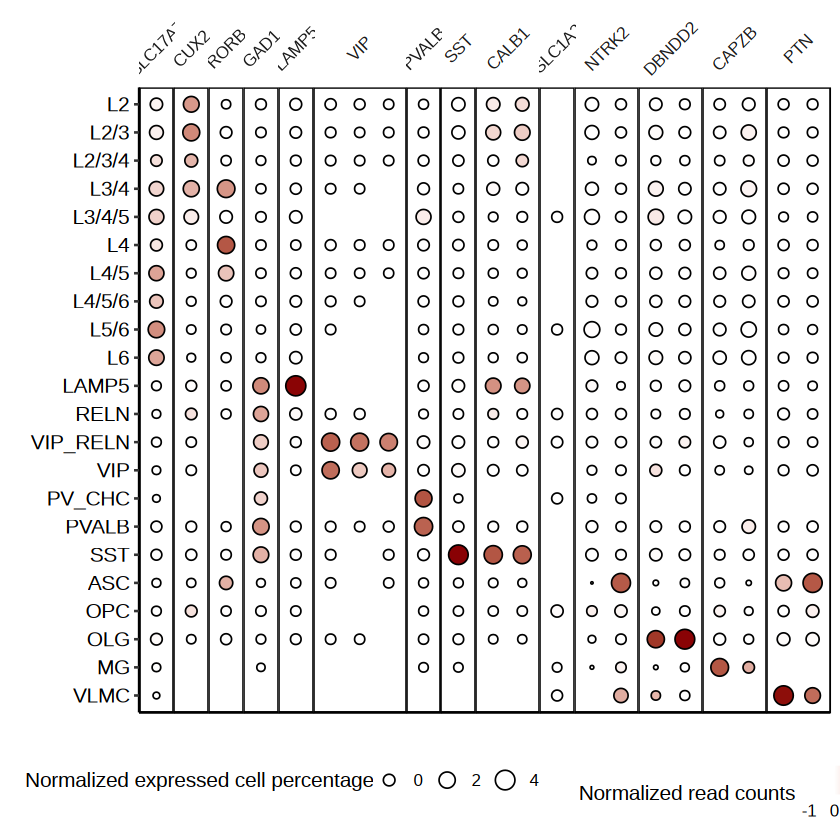

In [45]:
#head(mkdfi)
pt = ggplot(mkdfi[mkdfi$`readnumt.x` > 5 & !(mkdfi$transcript_id %in% c("XM_005582049.2","DBNDD2-FS-1")),],aes(x = areatr,y = transcript_id,fill = readnorm,size = cellpnorm)) + geom_point(shape = 21) + theme_pubr() + 
scale_fill_gradient2(low = "white",high = rgb(137,1,4,maxColorValue = 255)) + 
facet_grid(~gene_id,scales = "free",space = "free") + 
#geom_vline(xintercept = vertical.lines,lty="dashed", color = "black", linewidth = 0.5) +
scale_size_continuous(range = c(0.01,5)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.background = element_rect(fill = NA,color = NA),
      panel.spacing = unit(0,'lines'),
      legend.position = "bottom",
      strip.text.x = element_text(angle = 45,vjust = 0.5),
     panel.border = element_rect(fill = NA)) +
coord_flip() + labs(x = "",y = "",fill = "Normalized read counts",size = "Normalized expressed cell percentage")
#vertical.lines = seq(1.5,nrow(objprect)-0.5,1)
pt
ggexport(pt,filename = "result/figure3/subclass_marker_case_plot_25_11_26.pdf",width = 18,height = 6)

In [108]:
mkcase = c("SLC17A7","PDZD2","CUX2","MYLK",
           "RORB","IL1RAPL2","ETV1","TLE4","SEMA3E",
           "GAD1","LAMP5","FBXL7",
            "RELN","VIP","SOX6","PVALB","SST","CALB1","SLC1A2","NTRK2","SETD5","DBNDD2",
           "CAPZB","PTN","COL1A2")
mkcase = mkcase[mkcase %in% rownames(scale_data_matrix)]
mkdf = scale_data_matrix[mkcase,]
mkdf = as.matrix(mkdf)
mkdf = melt(mkdf,varnames = "row.names")
colnames(mkdf) = c("gene_id","cellid","norm")
mkdf$cellid = as.character(mkdf$cellid )
mkdf$subclass = MySplit(mkdf$cellid,"-",2)
mkdf = mkdf %>% group_by(subclass) %>% mutate(cellnumt = length(unique(cellid)))
nrow(mkdf[mkdf$gene_id == "SLC17A7",])

mkdf = mkdf %>% group_by(subclass,gene_id) %>% summarise(cellnum = length(norm[norm > 1]),norm = mean(norm),
                                                         cellprop = cellnum/cellnumt[1])
#mkdf = mkdf %>% group_by(gene_id) %>% mutate(cellprop = scale(cellprop))
mkdf[mkdf$gene_id == "SLC17A7",]

[1] 37289

`summarise()` has grouped output by 'subclass'. You can override using the
`.groups` argument.


subclass,gene_id,cellnum,norm,cellprop
<chr>,<fct>,<int>,<dbl>,<dbl>
ASC,SLC17A7,1157,0.8332403,0.4533699
EC,SLC17A7,2,0.6356999,0.4000000
L2,SLC17A7,1229,1.1541262,0.6151151
L2/3,SLC17A7,3344,1.4342214,0.7416279
L2/3/4,SLC17A7,1107,1.4764515,0.7350598
L3/4,SLC17A7,2880,1.5637808,0.8035714
L3/4/5,SLC17A7,297,1.7036479,0.8342697
L4,SLC17A7,2419,1.3426713,0.6991329
L4/5,SLC17A7,3440,1.7042705,0.8400488


file saved to result/figure4/subclass_marker_case_plot_genelevel_25_03_12.pdf



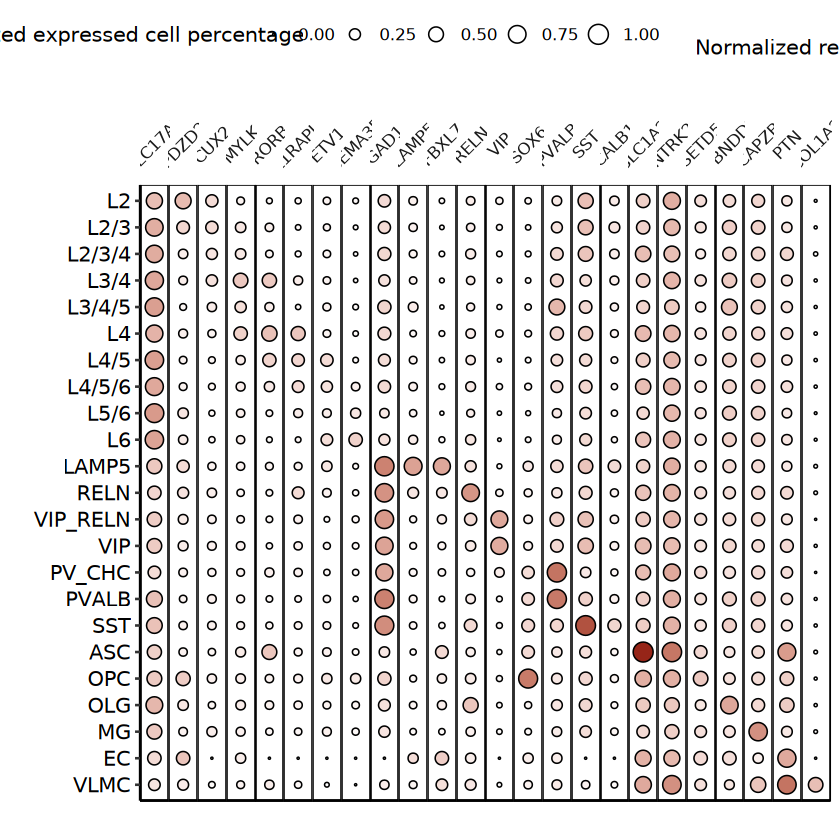

In [109]:
#
#mkcase = c("SLC17A7","GPR83","CUX2","PDZD2","CUX1","MYLK","PLCH1","RORB","IL1RAPL2","ETV1","TLE4","SEMA3E","GAD1","GAD2","ADARB2","LAMP5","FBXL7","KIT","EYA4","CALB2","RELN,
#           VIP","SOX6","DAMTSL1","PVALB","SST","CALB1","SLC1A2","SLC1A3","PTPRZ1","PDGFRA","COL9A1","PLP1","ITGAM","COL1A2")

suborder = c('L2','L2/3','L2/3/4','L3/4','L3/4/5','L4','L4/5','L4/5/6','L5/6','L6','LAMP5','RELN',
             'VIP_RELN','VIP','PV_CHC',"PVALB",'SST','ASC','OPC','OLG','MG','EC','VLMC')
#mkcase = c(mklc[mklc$cluster == areai,]$gene,"VIP")[1:10]
mkdf$subclass = factor(mkdf$subclass,levels = rev(suborder))
mkdf$gene_id = factor(mkdf$gene_id,levels = mkcase)
#head(mkdfi)
pt = ggplot(mkdf,aes(x = subclass,y = gene_id,fill = norm,size = cellprop)) + geom_point(shape = 21) + theme_pubr() + 
scale_fill_gradient2(low = "white",high = rgb(137,1,4,maxColorValue = 255),midpoint = 2.5,
                     mid = rgb(196,116,98,,maxColorValue = 255)) + 
facet_grid(~gene_id,scales = "free",space = "free") + 
#geom_vline(xintercept = vertical.lines,lty="dashed", color = "black", linewidth = 0.5) +
scale_size_continuous(range = c(0.001,5)) +
theme(axis.text.x = element_blank(),axis.ticks.x = element_blank(),
      strip.background = element_rect(fill = NA,color = NA),
      panel.spacing = unit(0,'lines'),
      strip.text.x = element_text(angle = 45,vjust = 0.5),
     panel.border = element_rect(fill = NA)) +
coord_flip() + labs(x = "",y = "",fill = "Normalized read counts",size = "Normalized expressed cell percentage")
#vertical.lines = seq(1.5,nrow(objprect)-0.5,1)
pt
ggexport(pt,filename = "result/figure4/subclass_marker_case_plot_genelevel_25_03_12.pdf",width = 18,height = 6)

### DTU analysis

#### Basic Stat

In [18]:
dtumkdf.hub = qread("result/figure3/class_DTU_by_subclass_ttest_25_10_11.qs")
dtumkdf.hub[dtumkdf.hub$cluster == "NonNeuron",]$cluster = "NN"
datas3$Class_DTU = dtumkdf.hub
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$sig != "N",]
length(unique(isosigi$gene_id))
length(unique(dtumkdf.hub$gene_id))

[1] 1105

[1] 185

,areatr,count,group,class
,<fct>,<int>,<chr>,<chr>
1,ASC,389,gene,NonNeuron
2,L2,272,gene,GLU
3,L2/3,202,gene,GLU
4,L2/3/4,169,gene,GLU
5,L3/4,189,gene,GLU
6,L3/4/5,112,gene,GLU


file saved to result/figure4/dtu_number_stat_subclass_stat_total_25_10_11.pdf



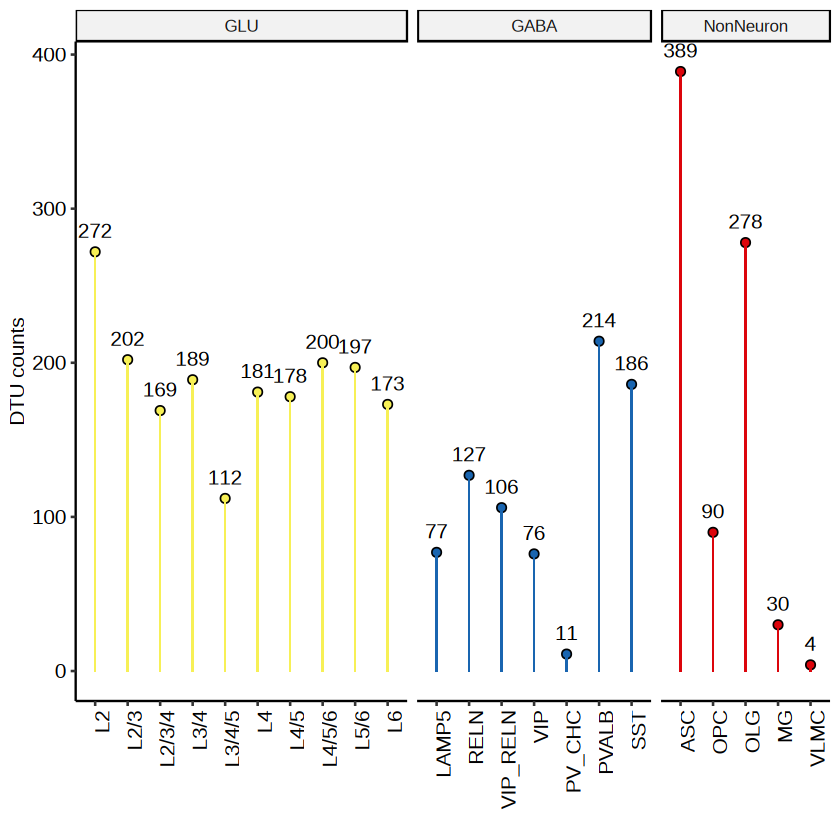

In [22]:
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$sig != "N",]
#isosigi = isosigi %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) == 1)
dtustdfg = isosigi %>% group_by(areatr) %>% summarise(count = length(unique(gene_id)),group = "gene")
# dtumkdf.hub = dtumkdf.hub %>% group_by(gene_id) %>% filter(length(unique(cluster)) == 1)
# dtustdfg.cl = dtumkdf.hub %>% group_by(cluster) %>% summarise(count = length(unique(gene_id)),group = "gene")
# dtustdfg.cl[dtustdfg.cl$cluster == "NN",]$cluster = "NonNeuron"
#colnames(dtustdfg.cl)[1] = "areatr"
# dtustdfg.cl$class = dtustdfg.cl$areatr
# dtustdfg.cl$areatr = paste0(dtustdfg.cl$areatr,"-uni")
dtustdfg = merge(dtustdfg,cellan,by.x ="areatr",by.y = "subclass")
dtustdf = dtustdfg
dtustdf$areatr = factor(dtustdf$areatr,levels = suborder)
#dtustdf$areatr = factor(dtustdf$areatr,levels = c("GLU-uni","GABA-uni","NonNeuron-uni",suborder))
#dtustdft = isosigi %>% group_by(areatr) %>% summarise(count = length(unique(transcript_id)),group = "isoform")
#dtustdf = rbind(dtustdfg,dtustdft)
#dtustdf = merge(dtustdf,cellan,by.x ="areatr",by.y = "subclass")
#dtustdf = merge(dtustdf,cellst,by.x ="areatr",by.y = "subclass")
head(dtustdf)
dtustdf$classid = dtustdf$class
dtustdf$classid = factor(dtustdf$classid,levels = c("GLU","GABA","NonNeuron"))
pison1 = ggplot(data = dtustdf,aes(x = areatr,y = count,fill = class))+ 
    geom_point(position = position_dodge(0.5),shape = 21,size = 2) + 
    geom_bar(position = position_dodge(0.5),stat = "identity",width = 0.05) +
    facet_grid(~classid,space = "free",scale = "free") +
    geom_text(position = position_dodge(0.5),aes(label=count),vjust = -1) + 
    scale_fill_manual(values = c('#1965B0',"#F7F056",'#DC050C')) +
    scale_color_manual(values = c('#1965B0',"#F7F056",'#DC050C')) +
    theme_pubr() + theme(axis.text.x = element_text(angle = 90,hjust = 1),legend.position = "none") + 
xlab("") + ylab("DTU counts")
pison1
ggexport(pison1,filename = "result/figure4/dtu_number_stat_subclass_stat_total_25_10_11.pdf",width = 5.3,height = 3)

In [72]:
#DTU vs DEG
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "class"
classmk = FindAllMarkers(srtt)

Calculating cluster GABA

Calculating cluster GLU

Calculating cluster NonNeuron



In [25]:
mkls = qread(file = "result/figure3/gene_marker_list_cell_24_12_09.qs")
classmk = mkls$class
dtumkdf.hub = qread("result/figure3/class_DTU_by_subclass_ttest_25_10_11.qs")

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
file saved to result/figure3/Class_DTU_DEG_overlap_venn_25_12_03.pdf



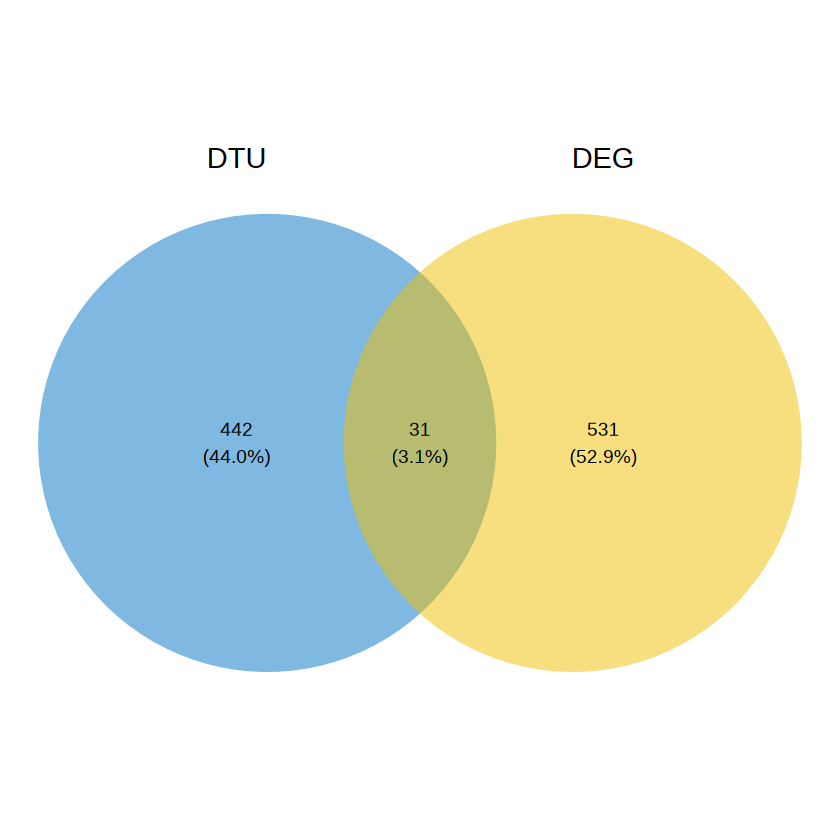

In [73]:
classmk.hub = classmk[classmk$p_val_adj < 0.01 & abs(classmk$avg_log2FC) > 1 & classmk$pct.1 > 0.25,]
deg.gene = unique(classmk.hub$gene)
# dtu.gene = unique(dtumkdf.hub$gene_id)
isosig = isosigls$class
dtu.gene = unique(isosig[isosig$sig != "N",]$gene_id)
#install.packages("BioVenn")
#specify values to use in venn diagram
#biovenn <- draw.venn(dtu.gene, deg.gene,list_z =NULL, xtitle="DTU", ytitle="DEG", ztitle="", 
#                      title="", subtitle="", nrtype="abs")
#plot(biovenn)
library(ggvenn)
pven = ggvenn(list("DTU" = dtu.gene,"DEG" = deg.gene),stroke_size = 0) + scale_fill_jco()
pven

ggexport(pven,filename = "result/figure3/Class_DTU_DEG_overlap_venn_25_12_03.pdf",
           width = 4, height = 4)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
file saved to result/figure3/subclass_layer_lobe_DTU_overlap_venn_25_10_11.pdf



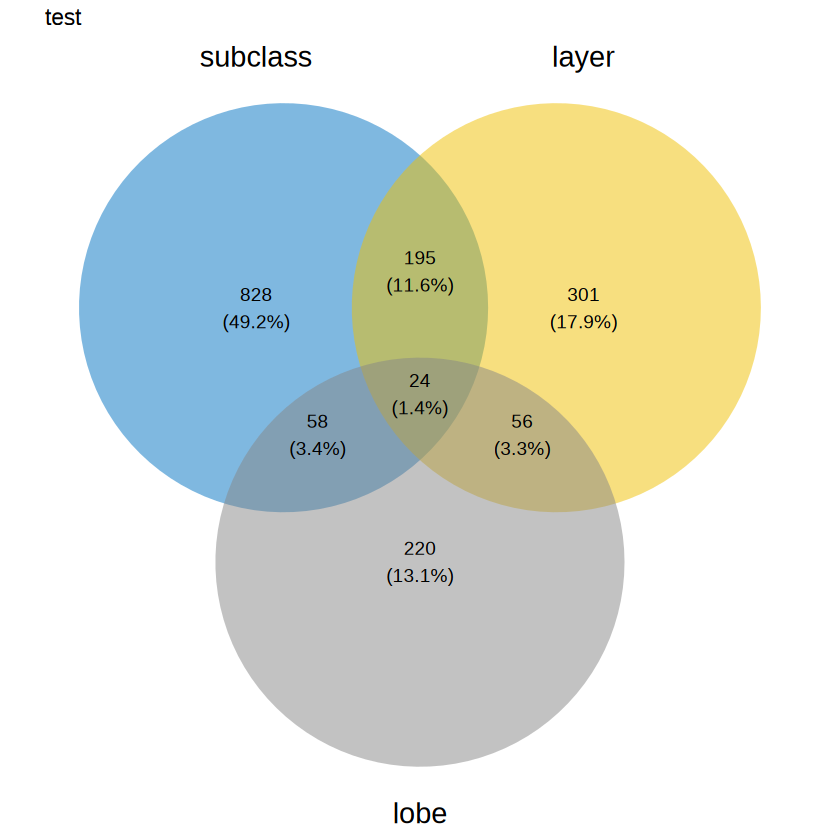

In [27]:
isosig = isosigls$subclass
dtu.sub = unique(isosig[isosig$sig != "N",]$gene_id)
isosig = isosigls$layer
dtu.layer = unique(isosig[isosig$sig != "N",]$gene_id)
isosig = isosigls$lobe
dtu.lobe = unique(isosig[isosig$sig != "N",]$gene_id)
library(ggvenn)
pven = ggvenn(list("subclass" = dtu.sub,"layer" = dtu.layer,"lobe" = dtu.lobe),stroke_size = 0) + scale_fill_jco()
pven + ggtitle("test")
ggexport(pven,filename = "result/figure3/subclass_layer_lobe_DTU_overlap_venn_25_10_11.pdf",
           width = 4, height = 4)

In [69]:
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "subclass"
subclassmk = FindAllMarkers(srtt)

Calculating cluster LAMP5

Calculating cluster PVALB

Calculating cluster PV_CHC

Calculating cluster RELN

Calculating cluster SST

Calculating cluster VIP

Calculating cluster VIP_RELN

Calculating cluster L2

Calculating cluster L2/3

Calculating cluster L2/3/4

Calculating cluster L3/4

Calculating cluster L3/4/5

Calculating cluster L4

Calculating cluster L4/5

Calculating cluster L4/5/6

Calculating cluster L5/6

Calculating cluster L6

Calculating cluster ASC

Calculating cluster EC

Calculating cluster MG

Calculating cluster OLG

Calculating cluster OPC

Calculating cluster VLMC



Loading required package: grid


Attaching package: 'grid'


The following object is masked from 'package:Biostrings':

    pattern


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
file saved to result/figure3/Sublass_DTU_DEG_overlap_venn_25_12_03.pdf



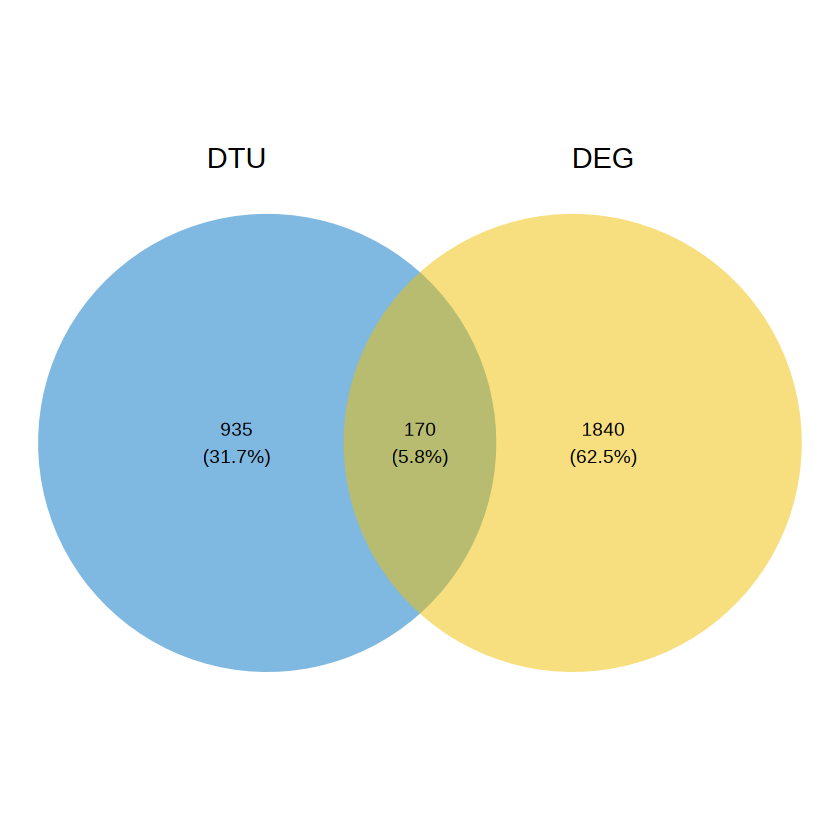

In [71]:
submk.hub = subclassmk[subclassmk$p_val_adj < 0.01 & abs(subclassmk$avg_log2FC) > 1 & subclassmk$pct.1 > 0.25,]
deg.gene = unique(submk.hub$gene)
isosig = isosigls$subclass
dtu.gene = unique(isosig[isosig$sig != "N",]$gene_id)

#install.packages("BioVenn")
#specify values to use in venn diagram
#biovenn <- draw.venn(dtu.gene, deg.gene,list_z =NULL, xtitle="DTU", ytitle="DEG", ztitle="", 
#                      title="", subtitle="", nrtype="abs")
#plot(biovenn)
library(ggvenn)
pven = ggvenn(list("DTU" = dtu.gene,"DEG" = deg.gene),stroke_size = 0) + scale_fill_jco()
pven
ggexport(pven,filename = "result/figure3/Sublass_DTU_DEG_overlap_venn_25_12_03.pdf",
           width = 4, height = 4)

In [ ]:
#DTU stat
isosig = isosigls$subclass
#filter
isosigf = isosig[isosig$pvalue < 0.05,]
length(unique(isosigf$gene_id))
tdtuid = unique(isosigf$gene_id)
library(ggvenn)

gvls = list()
hubtrans = NULL
hubtransdf = NULL
#colnames(hubtransdf)[2] = "cluster"
hubgenedf = unique(isosigf[isosigf$sig == "Up",c("gene_id","areatr")])
colnames(hubgenedf)[2] = "cluster"
for(i in 1:length(isosigls.cl)){
    tdtui = isosigls.cl[[i]]
    hubtransi = unique(tdtui[!tdtui$sig %in% c("N","Y"),]$transcript_id)
    hubtrans = unique(c(hubtrans,hubtransi))
    tdtui = unique(tdtui[!tdtui$sig %in% c("N","Y"),]$gene_id)
    hubgenedf = rbind(hubgenedf,data.frame("gene_id" = tdtui,"cluster" = names(isosigls.cl)[i]))
    hubtransdf = rbind(hubtransdf,data.frame("transcript_id" = hubtransi,"cluster" = names(isosigls.cl)[i]))
#    print(names(isosigls.cl)[i])
#    print(length(intersect(tdtuid,tdtui)))
#    gvls[[i]] = ggvenn(list("total" = tdtuid, "chunk" = tdtui))
}
#print(gvls)
length(hubtrans)
nrow(hubgenedf)

In [ ]:
#basic plot
dtustdf = NULL
dtustdfup = NULL
isosigls.cl2 = isosigls.cl
names(isosigls.cl2) = c("Neuron vs NN","GABA vs NN","GLU vs NN","GABA vs GLU","Within GABA","Within GLU","Within NN")
for(i in 1:length(isosigls.cl2)){
    tdtui = isosigls.cl2[[i]]
    hubti = unique(tdtui[tdtui$sig != "N" & abs(tdtui$dr) > 0.1,]$transcript_id)
    hubti = hubti[hubti %in% fsrawdp$transcript_id]
    hubgi = unique(tdtui[tdtui$sig != "N" & abs(tdtui$dr) > 0.1,]$gene_id)
    dtustdf = rbind(dtustdf,data.frame("group" = names(isosigls.cl2)[i],
                                       "count" = c(length(unique(hubti)),length(unique(hubgi))),
                                       "type" = c("isoform","gene")))
    dtustdfup = rbind(dtustdfup,data.frame("group" = names(isosigls.cl2)[i], "txid" = c(hubti,hubgi), 
                                           "type" = c(rep("isoform",length(hubti)), rep("gene",length(hubgi))) ))
}

#dtustdfup = dcast(dtustdfup,txid+type~group,fun.aggregate = length)
head(dtustdfup)


In [ ]:
#plot basic stat
dtustdf = dtustdf[order(dtustdf$group),]
pb1 = ggplot(dtustdf,aes(x = group,y = count, fill = type)) + 
geom_bar(stat = "identity",position = "dodge",color = "black",width = 0.9) + 
geom_text(aes(label = count),angle = 90,position = position_dodge(0.9),hjust = 1) +
theme_pubr() + 
theme(axis.text.x = element_text(angle = 90)) + scale_fill_flatui() + xlab("") + ylab("DTU Isoform/gene number")
pb1
ggexport(pb1,filename = "result/figure3/dtu_number_stat_class_24_04_02.pdf",width = 3,height = 5)

In [ ]:
library(ggupset)
#dtustdfup = dtustdfup[,c("txid","type","group")]
dtustdfup2 = dtustdfup[dtustdfup$group %in% c("GABA vs GLU","GABA vs NN", "GLU vs NN"),] %>%
  group_by(type,txid) %>%
  summarize(group = list(group))
pisonup1 = ggplot(data = dtustdfup2,aes(x = group,fill = type))+ 
    scale_x_upset() + 
    geom_point(stat = "count",position = position_dodge(0.5),shape = 21,size = 5) + 
    geom_bar(position = position_dodge(0.5),width = 0.1) +
    geom_text(stat = "count",aes(label=after_stat(count)),position = position_dodge(0.5),vjust = -1) + 
    scale_fill_flatui() +
    scale_color_flatui() +
    theme_pubr()
pisonup1
ggexport(pisonup1,filename = "result/figure3/dtu_number_stat_class_upset_24_04_22.pdf",width = 5,height = 5)

In [ ]:
colnames(dtustdfup)[3:9] = c("Within GABA","GABA vs GLU","GABA vs NN","Within GLU","GLU vs NN","Neuron vs NN","Within NN")
genres = colnames(dtustdfup)[3:9]

upset(
    dtustdfup,
    genres,
    base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill=type)
        )
    ),
    width_ratio=0.1
)

#### Case UMAP plot

In [ ]:
DefaultAssay(srtt) = "RNA"
Idents(srtt) = "class"
classmk = FindAllMarkers(srtt)
head(classmk)
Idents(srtt) = "class"
DimPlot(srtt)

In [58]:
library(scCustomize)

In [67]:
library(scCustomize)
DefaultAssay(srtt) = "ISOFORM"
isodf = GetAssayData(srtt,assay = "ISOFORM")
umapdf = as.data.frame(srtt@reductions$umap@cell.embeddings)
library(ggpointdensity)
featurei = c("GRIP1-XM-015431169.1","GRIP1-XM-015431173.1")
Feature_Density = function(umapdf,isodf,featurei){
    pci3 = list()
    for(i in 1:length(featurei)){
        # library(ggpointdensity)
        isodfi = isodf[featurei[i],]
        isodfi1 = names(isodfi[isodfi>0])
        umapdf.back = umapdf[!rownames(umapdf) %in% isodfi1,]
        umapdf.plot = umapdf[isodfi1,]
        pci3i = ggplot() +
            geom_point(data = umapdf.back,aes(x = umap_1,y = umap_2),color = "grey") +
            geom_pointdensity(data =  umapdf.plot,aes(x = umap_1,y = umap_2),size = 0.1) + NoLegend() +
            scale_color_viridis(option = "A") + theme_void() + ggtitle(featurei[i])
        # pci3i = plot_density(srtt,features = featurei[i],
        #             pal = "magma",size = 0.2,reduction = "umap") + NoLegend() +
        # ggtitle(featurei[i]) + theme_void() + coord_fixed()
        pci3[[i]] = pci3i
    }
    pci3 = ggarrange(plotlist = pci3,common.legend = T,legend = "right")
    pci3
    return(pci3)
}

#pal <- viridis(n = 10, option = "D")
#Plot_Density_Custom(seurat_object = srtt, features = "CDC42-NM-001283401.1",cols = pal)
#Plot_Density_Custom(seurat_object = srtt, features = "CDC42-CDC42-WeiLab-1",cols = pal)
#FeaturePlot(srtt,features = c("COL5A2-MICALL1-WeiLab-1"),order = TRUE,pt.size = sn) + scale_color_viridis(option = "B")
#FeaturePlot(srtt,features = c("COL5A2-MICALL1-WeiLab-2"),order = TRUE,pt.size = sn) + scale_color_viridis(option = "B")


In [68]:
pdtucd = list()
pdtucd[[1]] = Feature_Density(umapdf, isodf, featurei = c("NTRK2-XM-005582047.2","NTRK2-XM-005582051.2"))
pdtucd[[2]] = Feature_Density(umapdf, isodf, featurei = c("DDRGK1-DDRGK1-FS-1","DDRGK1-XM-005568473.2"))
#pdtucd[[3]] = Feature_Density(umapdf, isodf, featurei = c("CDC42-CDC42-WeiLab-1","CDC42-NM-001283401.1"))
#pdtucd[[3]] = Feature_Density(umapdf, isodf, featurei = c("DBNDD2-XM-015429879.1","DBNDD2-XM-005569136.2"))
pdtucd[[3]] = Feature_Density(umapdf, isodf, featurei = c("TUSC3-XM-005562645.2","TUSC3-XM-005562646.2"))
pdtucd = ggarrange(plotlist = pdtucd,nrow = 3)
ggexport(pdtucd,filename = "result/figure3/DTU_UMAP_cases_plot_density_25_12_03.pdf",width = 6,height = 9)

file saved to result/figure3/DTU_UMAP_cases_plot_density_25_12_03.pdf



In [50]:
isosigi = isosigls$subclass
geneex = "AKR1A1"
isosigi[isosigi$gene_id == geneex,]

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
3265,AKR1A1,XM_005595589.2,ASC,27,85,0.3176471,0.4387589,0.4488515,-0.131204443,Down,1.57888e-06,2.184531e-05
3266,AKR1A1,XM_005595589.2,L2,20,51,0.3921569,0.4387589,0.4426424,-0.050485489,N,1.57888e-06,2.184531e-05
3267,AKR1A1,XM_005595589.2,L2/3,53,189,0.2804233,0.4387589,0.4519535,-0.171530203,Down,1.57888e-06,2.184531e-05
3268,AKR1A1,XM_005595589.2,L2/3/4,18,40,0.4500000,0.4387589,0.4378221,0.012177910,N,1.57888e-06,2.184531e-05
3269,AKR1A1,XM_005595589.2,L3/4,71,190,0.3736842,0.4387589,0.4441817,-0.070497529,N,1.57888e-06,2.184531e-05
3270,AKR1A1,XM_005595589.2,L4,42,99,0.4242424,0.4387589,0.4399686,-0.015726131,N,1.57888e-06,2.184531e-05
3271,AKR1A1,XM_005595589.2,L4/5,84,194,0.4329897,0.4387589,0.4392396,-0.006249925,N,1.57888e-06,2.184531e-05
3272,AKR1A1,XM_005595589.2,L4/5/6,45,120,0.3750000,0.4387589,0.4440721,-0.069072090,N,1.57888e-06,2.184531e-05
3273,AKR1A1,XM_005595589.2,L5/6,55,112,0.4910714,0.4387589,0.4343995,0.056671957,N,1.57888e-06,2.184531e-05


In [128]:
#classmk.hub = classmk[classmk$avg_log2FC > 1 & classmk$p_val_adj < 0.05 & classmk$`pct.1` > 0.3,]
isosigi = isosigls$subclass
isosigi[isosigi$gene_id == "SIVA1",]
isosigi = isosigi[isosigi$sig != "N" & abs(isosigi$dr) > 0.15,]
isosigi = isosigi[isosigi$areatr == "RELN" & isosigi$count > 50,]
isosigi = isosigi[order(-isosigi$genecount),]
isosigi
#isosigi[isosigi$gene_id %in% c("CDC42","MYL6","RWDD1"),]
#classmk.hub[classmk.hub$gene %in% isosigi$gene_id,]

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
102295,SIVA1,XM_005562346.2,ASC,188,205,0.91707317,0.90905446,0.90860897,0.008464199,N,0.0001004914,0.0008219245
102296,SIVA1,XM_005562346.2,L2,299,321,0.93146417,0.90905446,0.90780947,0.023654703,N,0.0001004914,0.0008219245
102297,SIVA1,XM_005562346.2,L2/3,897,984,0.91158537,0.90905446,0.90891385,0.002671516,N,0.0001004914,0.0008219245
102298,SIVA1,XM_005562346.2,L2/3/4,180,203,0.88669951,0.90905446,0.91029640,-0.023596890,N,0.0001004914,0.0008219245
102299,SIVA1,XM_005562346.2,L3/4,610,666,0.91591592,0.90905446,0.90867326,0.007242652,N,0.0001004914,0.0008219245
102300,SIVA1,XM_005562346.2,L3/4/5,62,66,0.93939394,0.90905446,0.90736893,0.032025011,N,0.0001004914,0.0008219245
102301,SIVA1,XM_005562346.2,L4,407,464,0.87715517,0.90905446,0.91082664,-0.033671466,N,0.0001004914,0.0008219245
102302,SIVA1,XM_005562346.2,L4/5,643,728,0.88324176,0.90905446,0.91048849,-0.027246736,N,0.0001004914,0.0008219245
102303,SIVA1,XM_005562346.2,L4/5/6,343,375,0.91466667,0.90905446,0.90874267,0.005924000,N,0.0001004914,0.0008219245


,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
109931,SUPT5H,XM_005589194.2,RELN,67,86,0.7790698,0.9215735,0.9294904,-0.1504206,Down,7.642048e-05,0.0006503127
121849,UCHL5,XM_005540283.2,RELN,52,59,0.8813559,0.7293573,0.7209130,0.1604430,Up,1.163037e-02,0.0387269081


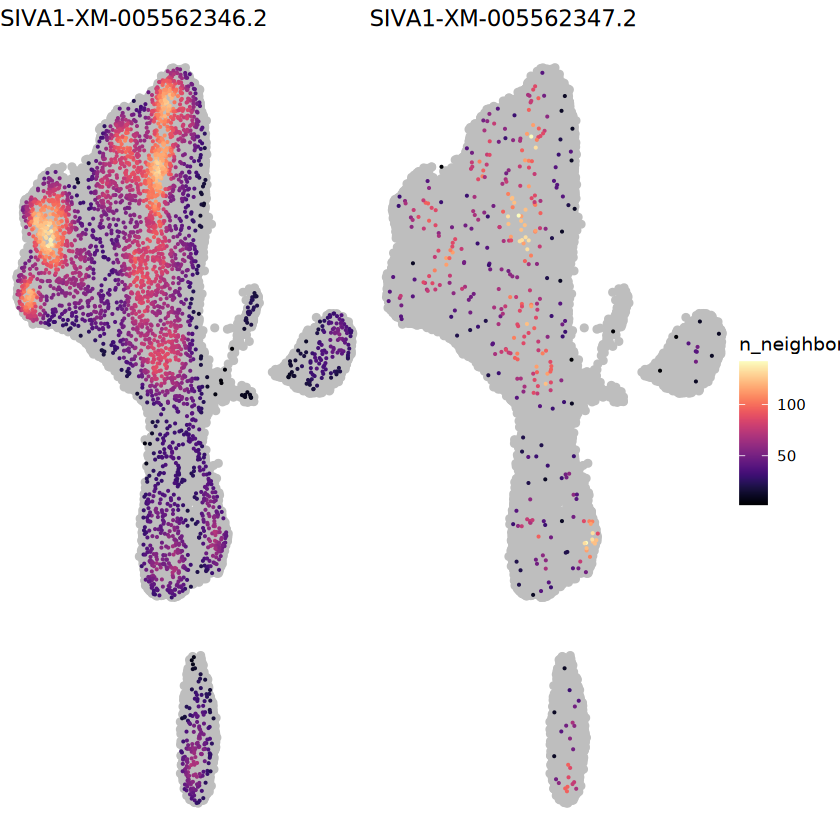

In [129]:
#Feature_Density(umapdf, isodf, featurei = c("MATN2-MATN2-WeiLab-1","MATN2-XM-005563764.2"))
#Feature_Density(umapdf, isodf, featurei = c("CDC42-CDC42-WeiLab-1","CDC42-NM-001283401.1"))
#Feature_Density(umapdf, isodf, featurei = c("DBNDD2-XM-015429879.1","DBNDD2-XM-005569136.2"))
#Feature_Density(umapdf, isodf, featurei = c("AKR1A1-XM-005595589.2","AKR1A1-XM-005595593.2"))
Feature_Density(umapdf, isodf, featurei = c("SIVA1-XM-005562346.2","SIVA1-XM-005562347.2"))
#"STRA13","AKR1A1"

In [ ]:
pdtucd = list()
pdtucd[[1]] = Feature_Density(umapdf, isodf, featurei = c("GRIP1-XM-015431169.1","GRIP1-XM-015431173.1"))
pdtucd[[2]] = Feature_Density(umapdf, isodf, featurei = c("GNAO1-XM-005591961.1","GNAO1-XM-005591962.1"))
pdtucd[[3]] = Feature_Density(umapdf, isodf, featurei = c("ZNF385B-XM-005573610.2","ZNF385B-XM-015432444.1"))
ggexport(pdtucd,filename = "result/figure3/DTU_UMAP_cases_plot_density_24_12_11.pdf",width = 9,height = 5)

In [ ]:
#FeaturePlot(srtt,features = c("SLC17A7
#srtt@assays
#DefaultAssay(srtt) = "ISOFORM"
pal <- viridis(n = 10, option = "C")
pmkls = list()
pmkls[[1]] = FeaturePlot_scCustom(seurat_object = srtt, features = c("SLC17A7","SLC17A7-XM-005589901.2"),na_cutoff = 1.5,
                                  order = T,colors_use = pal)
pmkls[[2]] = FeaturePlot_scCustom(seurat_object = srtt, features = c("GAD2","GAD2-XM-005564810.2"),na_cutoff = 1,
                                  order = T,colors_use = pal)
#FeaturePlot_scCustom(seurat_object = srtt, features = "SLC17A7-XM-005589901.2",order = T)
#FeaturePlot(srtt,features = c("SLC17A7"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
#FeaturePlot(srtt,features = c("SLC17A7-XM-005589901.2"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
#classmk[classmk$gene == "SLC17A7",]
#FeaturePlot_scCustom(seurat_object = srtt, features = c("GAD1","GAD1-XM-005573441.2"),order = T)
#FeaturePlot_scCustom(seurat_object = srtt, features = "GAD1-XM-005573441.2",order = T)
#FeaturePlot(srtt,features = c("GAD1"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
#FeaturePlot(srtt,features = c("GAD1-XM-005573441.2"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")

#FeaturePlot_scCustom(seurat_object = srtt, features = "GAD2-XM-005564810.2",order = T)

# FeaturePlot_scCustom(seurat_object = srtt, features = "KCNIP4",order = T)
# FeaturePlot_scCustom(seurat_object = srtt, features = "KCNIP4-NM-001284944.1",order = T)
# FeaturePlot_scCustom(seurat_object = srtt, features = "KCNIP4-XM-005554562.2",order = T)
#FeaturePlot(srtt,features = c("GAD2"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
#FeaturePlot(srtt,features = c("GAD2-XM-005564810.2"),order = TRUE,pt.size = 0.05,alpha = 0.5) + scale_color_viridis(option = "A")
pmkls
ggexport(pmkls,filename = "result/figure3/Class_Marker_UMAP_cases_plot_24_10_27.pdf",width = 8,height = 4)

In [ ]:
pmkc = Stacked_VlnPlot(seurat_object = srtt, features = c("SLC17A7","SLC17A7-XM-005589901.2","GAD2","GAD2-XM-005564810.2"), 
                x_lab_rotate = TRUE)
pmkc
ggexport(pmkc,filename = "result/figure3/Class_Marker_violin_cases_plot_24_10_27.pdf",width = 6,height = 5)

In [ ]:
# FeaturePlot_scCustom(seurat_object = srtt, features = c("CDC42","CDC42-CDC42-WeiLab-1","CDC42-NM-001283401.1"),order = T,
#                      na_cutoff = 1,colors_use = pal)
# FeaturePlot_scCustom(seurat_object = srtt, features = c("MYL6","MYL6-MYL6-WeiLab-1","MYL6-MYL6-WeiLab-2"),order = T,
#                      na_cutoff = 1,colors_use = pal)
geneex = "SIVA1"
isosigi = isosigls$class
featurei = unique(isosigi[isosigi$gene_id == geneex,]$transcript_id)
featurei = gsub("_","-",featurei)
featurei = paste0(geneex,"-",featurei)
featurei = c(geneex,featurei)
pdtui = FeaturePlot_scCustom(seurat_object = srtt, features = featurei,order = T,
                     colors_use = pal)
ggexport(pdtui,filename = "result/figure3/DTU_UMAP_cases_plot_SIVA1_24_10_27.pdf",width = 8,height = 8)
# FeaturePlot_scCustom(seurat_object = srtt, features = "AQP4",order = T)
# FeaturePlot_scCustom(seurat_object = srtt, features = "MYT1",order = T)
# FeaturePlot_scCustom(seurat_object = srtt, features = "OPALIN",order = T)

In [ ]:
#sn = 0.5
pal <- viridis(n = 10, option = "C")
pdtuc = FeaturePlot_scCustom(seurat_object = srtt, features = c("SEPT8","SEPT8-XM-005557744.2","SEPT8-XM-005557741.2",
                                                                    "GNAO1","GNAO1-XM-005591961.1","GNAO1-XM-005591962.1",
                                                                    "C15H9orf3","C15H9orf3-XM-005582299.2","C15H9orf3-XM-015436610.1"),
                             order = T,num_columns = 3,colors_use = pal,pt.size = 0.1)
#pdtuc[[2]] = FeaturePlot_scCustom(seurat_object = srtt, features = c("GNAO1","GNAO1-XM-005591961.1","GNAO1-XM-005591962.1"),order = T,num_columns = 3,colors_use = pal,pt.size = 0.1)
#pdtuc[[3]] = FeaturePlot_scCustom(seurat_object = srtt, features = c("ZNF385B","ZNF385B-XM-015432444.1","ZNF385B-XM-005573610.2"),order = T,num_columns = 3,colors_use = pal,pt.size = 0.1)
ggexport(pdtuc,filename = "result/figure3/DTU_UMAP_cases_plot_24_10_27.pdf",width = 12,height = 12)

In [ ]:
#classmk.hub = classmk[classmk$avg_log2FC > 1 & classmk$p_val_adj < 0.05 & classmk$`pct.1` > 0.3,]
isosigi = isosigls$class
isosigi[isosigi$gene_id == "C15H9orf3",]
isosigi = isosigi[isosigi$sig != "N" & abs(isosigi$dr) > 0.15,]
isosigi = isosigi[isosigi$areatr == "GABA" & isosigi$genecount > 50,]
isosigi = isosigi[order(-isosigi$genecount),]
unique(isosigi$gene_id)
#isosigi[isosigi$gene_id %in% c("CDC42","MYL6","RWDD1"),]
#classmk.hub[classmk.hub$gene %in% isosigi$gene_id,]

In [ ]:
geneex = "KCNIP4"
#transid = c("XM_005545567.2","XM_015445010.1")
isosigi = isosigls$class
unique(isosigi[isosigi$gene_id == geneex,]$transcript_id)
#mycolor = c('#DC050C','#1965B0')
#names(mycolor) = transid
fsraw.cor$areatr = fsraw.cor$class
IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,geneex,NULL,TRUE,NULL)

In [ ]:
as.data.frame(gtf[gtf$gene_id == "LAMP2",])

#### Class isoform clone cluster analysis

[1] 837

[1] 473

[1] 473

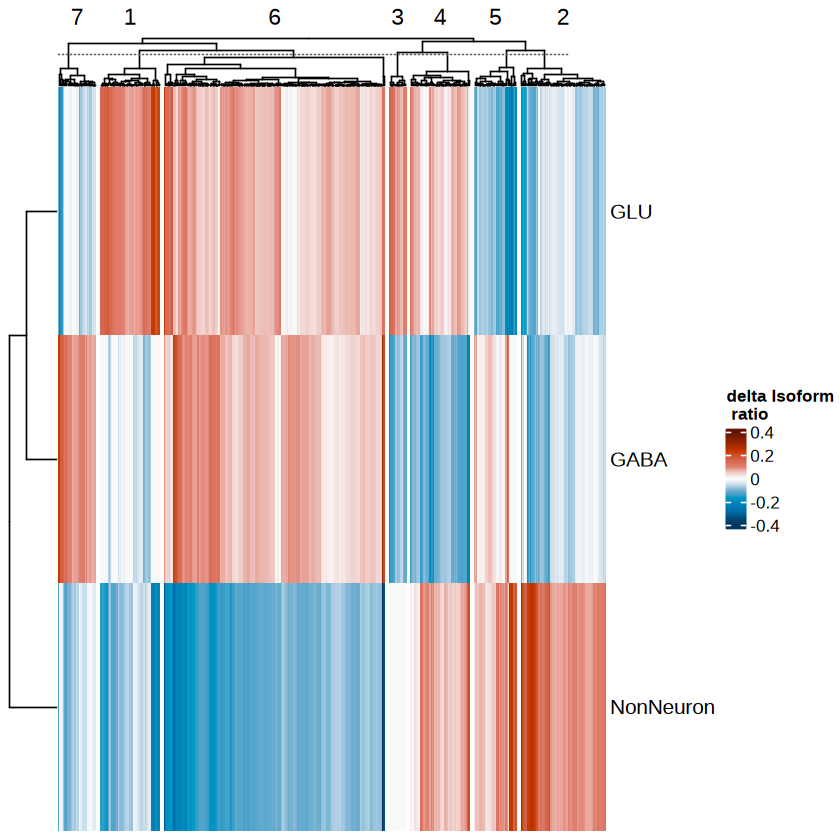

In [115]:
library(ComplexHeatmap)
isosigc = isosigls$class
isosigc$dr2 = isosigc$relative - isosigc$meanrelative
hubgene0 = unique(isosigc[isosigc$sig != "N" & isosigc$sig != "Y",]$transcript_id)

# isosigi = isosigls.cl$GABA_NonNeuron
# hubgene1 = unique(isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]$transcript_id)
# isosigi = isosigls.cl$GLU_NonNeuron
# hubgene2 = unique(isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]$transcript_id)
# isosigi = isosigls.cl$GABA_GLU
# hubgene3 = unique(isosigi[isosigi$sig != "N" & isosigi$sig != "Y",]$transcript_id)

isosigf2 = isosigc[isosigc$transcript_id %in% c(hubgene0),]
length(unique(isosigf2$transcript_id))
#isosigf2 = isosigc[isosigc$transcript_id %in% isosigf2$transcript_id,]
#isosigf2 = isosigf2 %>% group_by(transcript_id) %>% filter(max(abs(dr)) > 0.1)
isosigf2 = isosigf2 %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
length(unique(isosigf2$transcript_id))
length(unique(isosigf2$gene_id))
isosigf.mx1 = dcast(isosigf2,transcript_id~areatr,value.var = "dr2",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]
n = 7
isosigf.mx2 = isosigf.mx1
isosigf.mx2[isosigf.mx2>0] = 1
isosigf.mx2[isosigf.mx2<0] = -1
fit = kmeans(isosigf.mx2,n)
split <- factor(as.character(fit$cluster), levels=as.character(c(1:n)))

#splitc = c(4,1,1,1,2,2,2,2,2,2,2,3,5,3,3,3,3,3)
#splitc <- factor(splitc, levels=as.character(c(1:m)))
#reorder.hmap <- Heatmap(as.matrix(cellmxfn), split=split, cluster_row_slices = FALSE,
#                          show_row_names = F,column_order = cellorder)
#reorder.hmap
library(circlize)
col_fun = colorRamp2(c(-0.4,-0.1, 0,0.1, 0.4), hcl_palette = "RdBu",reverse = T)
isosigf.mx1 = as.matrix(isosigf.mx1)
pcloneht1 = Heatmap(t(isosigf.mx1),show_column_names = F,column_split = split,name = "delta Isoform\n ratio",col = col_fun)
pcloneht1

file saved to result/figure3/sigiso_class_transcript_dr_cluster_heatmap_24_11_26.pdf



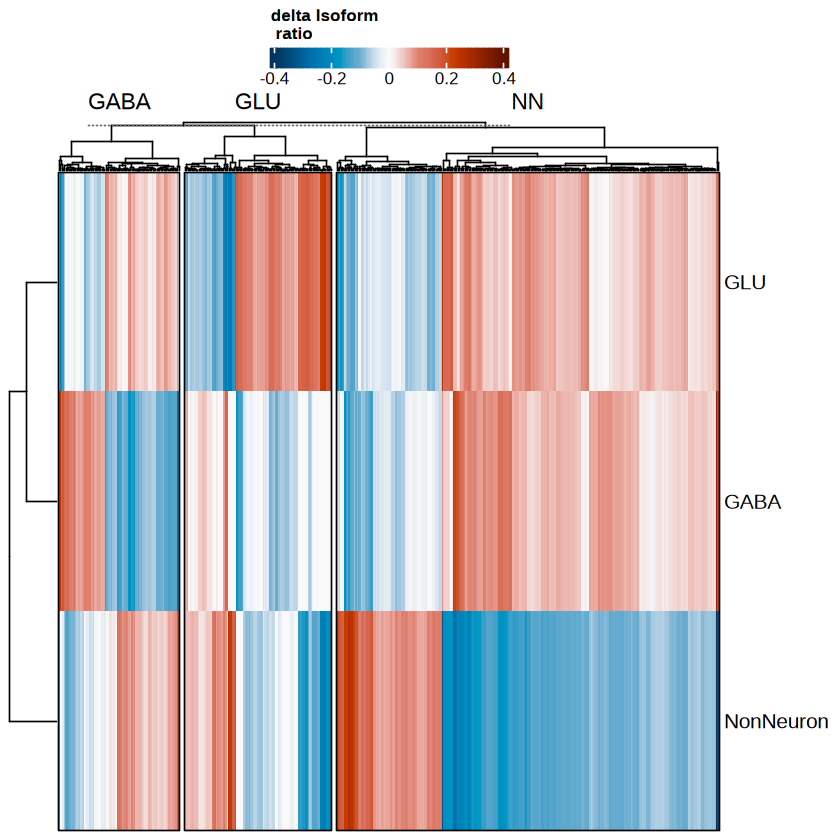

In [124]:
clist = list(NN = c(2,6),
               GLU = c(5,1,3),
               GABA = c(4,7))
split <- fit$cluster
for (i in 1:length(clist)) {
    split[which(split %in% clist[[i]])] = names(clist)[i]
}
  
split <- factor(as.character(split), levels=c("GABA","GLU","NN"))      
names(split) = names(fit$cluster)
pcloneht1 = Heatmap(t(isosigf.mx1),show_column_names = F,column_split = split,name = "delta Isoform\n ratio",
                    col = col_fun,border = 1,heatmap_legend_param = list(
                                      legend_direction = "horizontal", 
                                      legend_width = unit(5, "cm")
                                     ))
pcloneht1 = draw(pcloneht1, heatmap_legend_side = "top")
pcloneht1
ggexport(pcloneht1,filename = "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_24_11_26.pdf",width = 5.5,height = 3)

In [ ]:
dtust = as.data.frame(table(split))
dtust
pison1 = ggplot(data = dtust,aes(x = split,y = Freq,fill = split))+ 
    geom_point(position = position_dodge(0.5),shape = 21,size = 7) + 
    geom_bar(stat = "identity",width = 0.05) +
    geom_text(aes(label=Freq),vjust = -1) + 
    scale_fill_flatui() +
    scale_color_flatui() +
    theme_pubr()
pison1
ggexport(pison1,filename = "result/figure3/class_dtu_isoform_stat_10_27.pdf",width = 3,height = 4)

In [ ]:
#myclassan
isosigs = isosigls$subclass
isosigs = isosigs %>% group_by(transcript_id) %>% mutate(meanrelative.glu = mean(relative[areatr %in% cellan[cellan$class == "GLU",]$subclass]))
isosigs$dr2 = isosigs$relative - isosigs$meanrelative.glu
isosigf3 = isosigs[isosigs$transcript_id %in% rownames(isosigf.mx1),]
clusteran = data.frame("cluster" = split,"transcript_id" = rownames(isosigf.mx1))
isosigf3$cluster = clusteran[match(isosigf3$transcript_id,clusteran$transcript_id),]$cluster
isosigf3$class = cellan[match(isosigf3$areatr,cellan$subclass),]$class
clusteran = unique(isosigf3[,c("gene_id","transcript_id","cluster","class")])

pmst = ggplot(isosigf3,aes(x = class,y = abs(dr2),fill = class)) + 
geom_violin(size = 0.3,drop = FALSE) +
geom_boxplot(size = 0.3,fill = "white",width=0.1,cex=0.8,outlier.size = 0.3,position = position_dodge(0.9)) +
facet_grid(~cluster,scales = "free") + theme_pubr() + xlab("") + ylab("Delta Isoform Ratio Compare to GLU") +
scale_fill_flatui() +
stat_compare_means(aes(label = after_stat(p.signif)),hide.ns = F,comparisons = list(c("GABA","GLU"),c("GABA","NonNeuron"),
                                                                                                       c("GLU","NonNeuron"))) +
theme(axis.text.x = element_blank(),
       axis.ticks.x = element_blank(),
      panel.spacing = unit(0,'lines'),
      panel.border = element_rect(fill = NA)) 
pmst
ggexport(pmst,filename = "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_module_ana_24_10_27.pdf",width = 7,height = 5)
write.csv(clusteran, "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_module_ana_24_10_27.csv",quote = F, row.names = F)

[1] 376  22

[1] 376  22

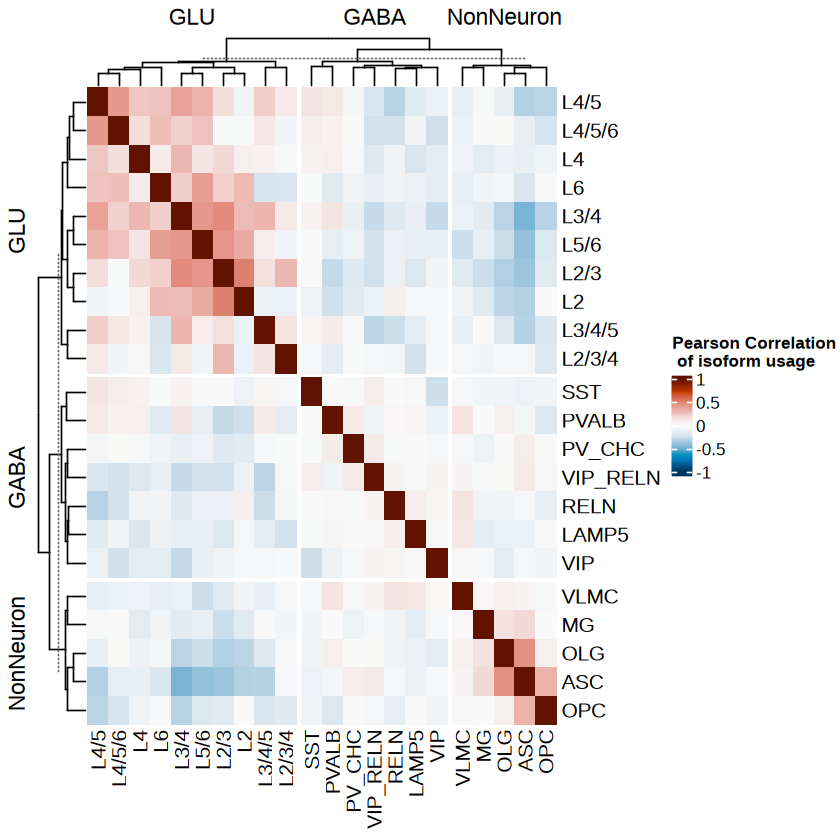

In [92]:
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$transcript_id %in% isosigi[isosigi$sig != "N",]$transcript_id,]
#isosigi = isosigt
#isosigf = isosigi[isosigi$sig != "N",]
#isosigf = isosigf %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) == 1)
#isosigf = isosigi[isosigi$transcript_id %in% isosigf$transcript_id,]
#isosigf$dr2 = isosigf$relative - isosigf$meanrelative
#isosigf1 = isosigf1[!isosigf1$areatr %in% c("EC"),]
isosigi = isosigi %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) > 17)
isosig.mx = dcast(isosigi,transcript_id~areatr,value.var = "dr",fun.aggregate = sum)
rownames(isosig.mx) = isosig.mx$transcript_id;isosig.mx = isosig.mx[-1]
dim(isosig.mx)
#isosig.mx = isosig.mx[,colSums(isosig.mx > 0) > 100]
dim(isosig.mx)
isosig.st = cor(isosig.mx,method = "pearson")
#isosig.st
library(circlize)
library(ComplexHeatmap)
# splitc = colnames(isosig.st)
# names(splitc) = colnames(isosig.st)
# splitc = cellan[match(names(splitc),cellan$subclass),]$class
# col_fun = colorRamp2(c(-1, 0, 1), hcl_palette = "RdBu",reverse = T)

splitc = cellan[match(colnames(isosig.st),cellan$subclass),]$class
splitc <- factor(splitc, levels=c("GLU","GABA","NonNeuron"))
library(circlize)
library(ComplexHeatmap)
col_fun = colorRamp2(c(-1, 0, 1), hcl_palette = "RdBu",reverse = T)
pcorht = Heatmap(isosig.st,name = "Pearson Correlation\n of isoform usage",row_split = splitc,column_split = splitc,col = col_fun)
pcorht

# pcorht = Heatmap(isosig.st,name = "Pearson Correlation\n of isoform usage",col = col_fun)
#                  #column_split = splitc,row_split = splitc)
# pcorht

In [93]:
ggexport(pcorht,filename = "result/figure3/DTU_clone_cluster_cor_between_class_total_25_11_26.pdf",width = 6.3,height = 5)

file saved to result/figure3/DTU_clone_cluster_cor_between_class_total_25_11_26.pdf



[1] 1968
[1] 1105


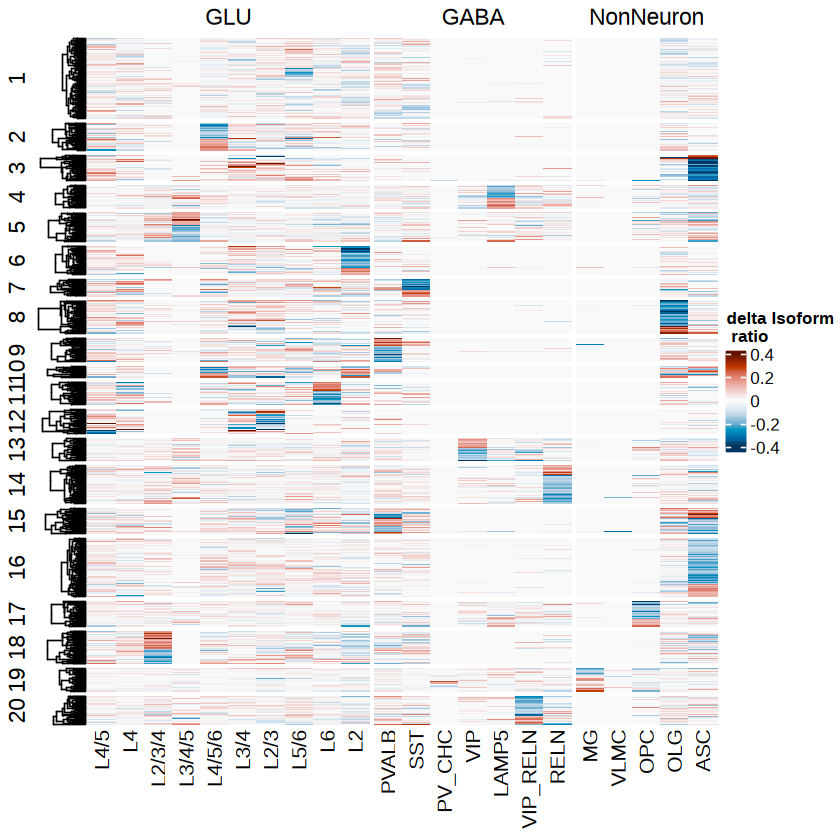

In [80]:
isosig4 = isosigls$subclass;hubtrans = unique(isosig4[isosig4$sig != "N",]$transcript_id)
# length(hubtrans)
#isosighub = isosighub %>% group_by(gene_id,transcript_id) %>% filter(length(unique(areatr)) == 1)
#isosighub = isosighub[isosighub$areatr %in% c("L2","ASC","OLG"),]
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$transcript_id %in% hubtrans,]
# isosigi = isosigi[!isosigi$areatr %in% c("MG","PV_CHC","VLMC","VIP","LAMP5") & isosigi$count > 10,]
# isosigi$sig = "sig"

#isosigi$dr2 = isosigi$relative - isosigi$meanrelative
print(length(unique(isosigi$transcript_id)))
#isosigi = isosigi %>% group_by(transcript_id) %>% filter(max(abs(dr)) > 0.1)
#isosigi = isosigi %>% group_by(transcript_id) %>% filter(count[which.max(abs(dr))] > 20)
isosigi = isosigi %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
#isosigi = isosigi[isosigi$count > 10,]
print(length(unique(isosigi$gene_id)))
isosigf.mx1 = dcast(isosigi,transcript_id~areatr,value.var = "dr",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]

n = 20
fit = kmeans(abs(isosigf.mx1),n)
fitcl = fit$cluster
levelid = c(as.character(1:20))
levelid = levelid[levelid %in% as.character(fitcl)]
split <- factor(as.character(fitcl),levels = levelid)
splitc = cellan[match(colnames(isosigf.mx1),cellan$subclass),]$class
splitc <- factor(splitc, levels=c("GLU","GABA","NonNeuron"))
names(split) = names(fitcl)
names(splitc) = names(colnames(isosigf.mx1))
library(circlize)
col_fun = colorRamp2(c(-0.4, 0, 0.4), hcl_palette = "RdBu",reverse = T)
isosigf.mx1 = as.matrix(isosigf.mx1) 
library(ComplexHeatmap)
pcloneht.total = Heatmap(isosigf.mx1,show_row_names = F,row_split = split, 
                         cluster_row_slices = FALSE,cluster_column_slices = FALSE,
                         show_column_dend  = FALSE,
                         column_split = splitc,name = "delta Isoform\n ratio",col = col_fun)

pcloneht.total

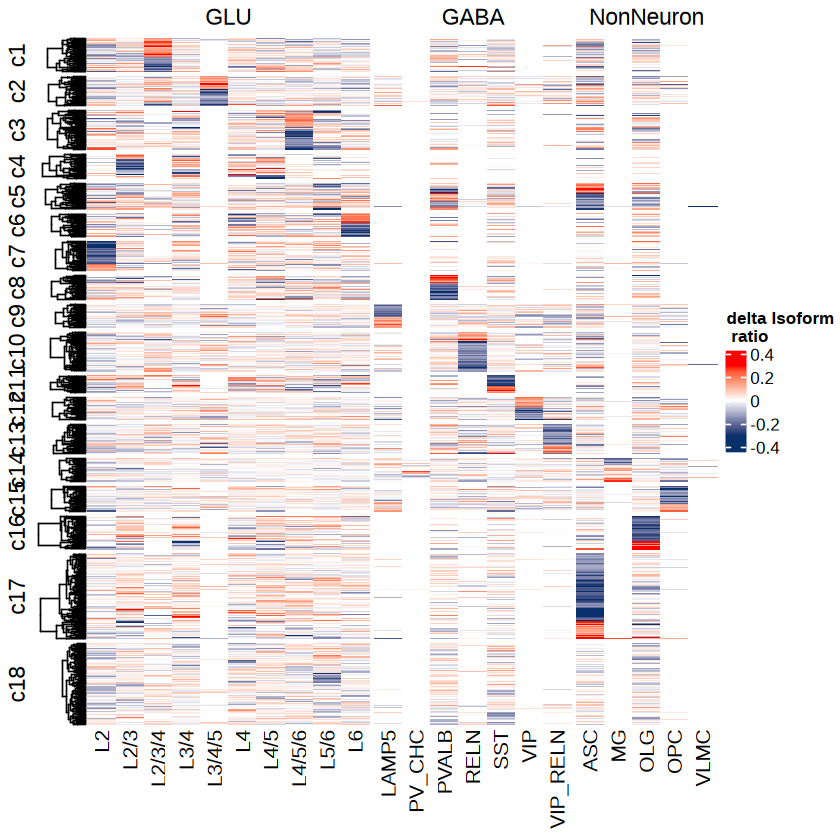

In [84]:
clist = list("c1" = c(18),"c2" = c(5),"c3" = c(2,10),
            "c4" = c(12),"c5" = c(15),"c6" = c(11),
             "c7" = c(10,6),"c8" = c(4),"c9"=c(9),"c10" = c(14),"c11" = c(7),
             "c12" = c(13),"c13" = c(20),
             "c14" = c(19),"c15" = c(17),"c16" = c(8),
             "c17" = c(15,16,3),"c18" = c(1)
            )

MergeCluster = function(htls,clist){
  #merge cluster
  split = as.character(htls$rowcluster)
  for (i in 1:length(clist)) {
    split[which(as.character(split) %in% as.character(clist[[i]]))] = names(clist)[i]
  }
  # 
  split = factor(as.character(split), levels = names(clist))
  names(split) = names(htls$rowcluster)
  reorder.hmap = Heatmap(htls$ht@matrix, 
                         name = "delta Isoform\n ratio",
                         row_split = split,
                         column_split = htls$colcluster,
                         # cluster_rows = F,
                         cluster_columns = F,
                         cluster_row_slices = FALSE,
                         cluster_column_slices = FALSE,
                         show_row_names = F,
                         col = colorRamp2(c(-0.3,0,0.3), 
                                          c("#08306B", "white", "red")),
                         column_order = htls$colorder
  )
  reorder.hmap
  htls$rowcluster = split
  htls$ht = reorder.hmap
  return(htls)
}
htls = list(rowcluster = split,ht = pcloneht.total,colcluster = splitc)

htls_od = MergeCluster(htls,clist)
htls_od$ht
#pcloneht.total
ggexport(htls_od$ht,filename = "result/figure3/DTU_clone_cluster_total_24_12_03.pdf",width = 5,height = 7)

In [ ]:
clusteran[clusteran$gene_id == "MYL6",]
isosigc = isosigls$class
isosigc[isosigc$gene_id == "CSPG5",]
max(abs(isosigc[isosigc$gene_id == "CSPG5",]$dr))

In [ ]:
ggexport(pcloneht1,filename = "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_24_04_21.pdf",width = 4,height = 6)

#### Clone Case plot

In [125]:
dtumkdf.hub = qread("result/figure3/class_DTU_by_subclass_ttest_25_10_11.qs")

In [14]:
pgabals = list()
hubgenes = unique(dtumkdf.hub[dtumkdf.hub$cluster == "GABA",]$gene_id)
isosigi = isosigls$class
for(i in 1:length(hubgenes)){
    geneex = hubgenes[i]
#transid = c("XM_005545567.2","XM_015445010.1")
#names(mycolor) = transid
    fsraw.cor$areatr = fsraw.cor$class
    pgabals[[i]] = tryCatch(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,geneex,NULL,TRUE,NULL), 
                                                  error = function(e) NULL)
}
ggexport(pgabals,filename = "result/figure3/DTU_gaba_reads_cases_plot_24_12_07.pdf",width = 5,height = 5)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


In [129]:
unique(dtumkdf.hub$cluster)
head(dtumkdf.hub)

[1] "GLU"       "GABA"      "NonNeuron"

,gene_id,transcript_id,pvalue,dr,cluster,qvalue
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
59,AGPAT4,NM_001283744.1,0.036047929,0.1075413,GLU,1
80,AKAP7,XM_005551840.2,0.001680890,-0.1270569,GLU,1
147,APRT,APRT-FS-2,0.031255038,-0.1490733,GLU,1
153,ARFIP2,NM_001283276.1,0.008221913,0.1434062,GLU,1
154,ARFIP2,XM_005578789.2,0.005116373,-0.1711690,GLU,1
188,ASIC3,XM_005551178.2,0.007652467,-0.1679861,GLU,1


In [ ]:
pgabals = list()
hubgenes = unique(dtumkdf.hub[dtumkdf.hub$cluster == "GLU",]$gene_id)
isosigi = isosigls$class
for(i in 1:length(hubgenes)){
    geneex = hubgenes[i]
#transid = c("XM_005545567.2","XM_015445010.1")
#names(mycolor) = transid
    fsraw.cor$areatr = fsraw.cor$class
    pgabals[[i]] = tryCatch(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,geneex,NULL,TRUE,NULL), 
                                                  error = function(e) NULL)
}


In [ ]:
ggexport(pgabals,filename = "result/figure3/DTU_glu_reads_cases_plot_24_12_09.pdf",width = 5,height = 5)

In [ ]:
ggexport(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,"BCAN",NULL,TRUE,NULL),
        filename = "result/figure3/DTU_reads_cases_plot_BCAN_24_11_07.pdf",width = 5,height = 5)

In [ ]:
ggexport(pgabals,filename = "result/figure3/DTU_gaba_reads_cases_plot_24_10_28.pdf",width = 5,height = 5)
#fsrawdpr = qread(file = "data/reads_full_anotation/main_data_read_total_annotation_dedup_forplot_24_04_28.qs")
#fsraw.cor = fsrawdpr[fsrawdpr$class != "",]

In [ ]:
geneex = "CDC42"
isosigi = isosigls$class
fsraw.cor$areatr = fsraw.cor$class
fsraw.cor$chunk = fsraw.cor$lobe
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
ggexport(pc1,filename = "result/figure3/specific_case_total_class_NN_CDC42_24_10_27.pdf",
           width = 6,height = 6)


In [43]:
hubgenes = unique(dtumkdf.hub[dtumkdf.hub$cluster == "GABA",]$gene_id)
isosigi = isosigls$class
isosigi = isosigi[isosigi$gene_id %in% hubgenes,]
isosigi = isosigi[isosigi$areatr == "GABA" & abs(isosigi$dr) > 0.15,]
isosigi = isosigi[order(-isosigi$genecount),]
isosigi

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
16144,MAGI1,XM_005547547.2,GABA,175,657,0.2663623,0.1658434,0.1155840,0.1507782,Up,6.296768e-25,1.599379e-22
4513,CDC42,CDC42-WeiLab-1,GABA,108,247,0.4372470,0.3354708,0.2845827,0.1526643,Up,8.806384e-07,2.374280e-05
4516,CDC42,NM_001283401.1,GABA,139,247,0.5627530,0.6645292,0.7154173,-0.1526643,Down,8.806384e-07,2.374280e-05
7196,DPYSL4,XM_005595566.2,GABA,161,196,0.8214286,0.7132027,0.6590897,0.1623388,Up,1.294006e-04,1.739519e-03
7199,DPYSL4,XM_005595567.2,GABA,35,196,0.1785714,0.2867973,0.3409103,-0.1623388,Down,1.294006e-04,1.739519e-03
16446,MATN2,MATN2-WeiLab-1,GABA,77,145,0.5310345,0.3906241,0.3204189,0.2106156,Up,2.120046e-05,3.905092e-04
22289,PVRL2,XM_005589550.2,GABA,17,134,0.1268657,0.2632928,0.3315063,-0.2046407,Down,1.572321e-05,3.109845e-04
22292,PVRL2,XM_005589551.2,GABA,117,134,0.8731343,0.7367072,0.6684937,0.2046407,Up,1.572321e-05,3.109845e-04
19546,OSER1,NM_001284007.1,GABA,46,132,0.3484848,0.2318059,0.1734664,0.1750185,Up,2.857714e-04,3.245019e-03


In [ ]:
geneex = "MAGI1"
isosigi = isosigls$class
fsraw.cor$areatr = fsraw.cor$class
fsraw.cor$chunk = fsraw.cor$subclass
pc1 = CasePlotTotalClass(fsraw.cor,isosigi,gtf,geneex,srtt)
pc1
fileid = paste0("result/figure3/specific_case_total_class_GLU_",geneex,"_24_12_10.pdf")
ggexport(pc1,filename = fileid, width = 6,height = 6)

In [44]:
geneex = "MAGI1"
fsraw.cor$areatr = fsraw.cor$class
pc1 = IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,geneex,NULL,TRUE,NULL)
fileid = paste0("result/figure3/splice_case_class_",geneex,"_24_12_10.pdf")
ggexport(pc1,filename = fileid, width = 6,height = 6)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message in grid.newpage():
"Cannot open temporary file '/tmp/RtmphekSUb/pdf14445bba87d1' for compression (reason: No such file or directory); compression has been turned off for this device"
Warning message:
"Removed 21 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 14 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`)."
file saved to result/figure3/splice_case_class_DPYSL4_24_12_10.pdf



`summarise()` has grouped output by 'class', 'subclass', 'gene_id'. You can
override using the `.groups` argument.
Warning message in stat_compare_means(method = "t.test", label = "p.signif", ref.group = ".all.", :
"Ignoring unknown parameters: `map_signif_level`, `tip_length`, and `margin_top`"
file saved to result/figure3/Class_DTU_case_box_plot_25_11_26.pdf



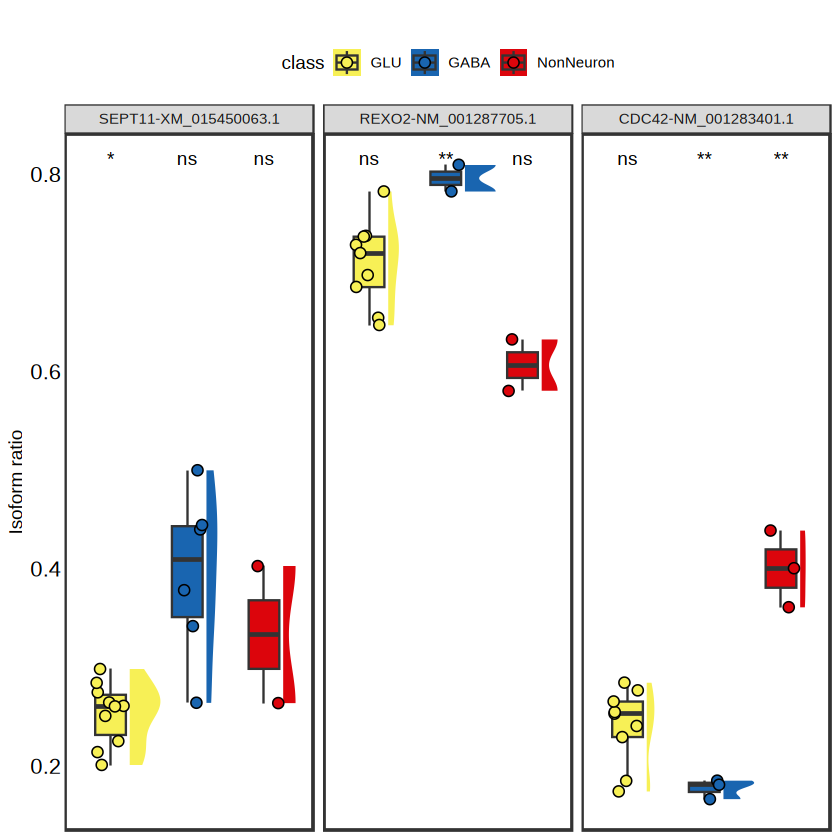

In [271]:
#subclass box plot
#genecs = c("MYL6","AKR1A1","CDC42")
# #trancs = c('XM_005595593.2','NM_001283401.1','MYL6-WeiLab-1')
# genecs = c("SEPT11","REXO2","CDC42")
# trancs = c('XM_015450063.1','NM_001287705.1','NM_001283401.1')
# ST8SIA5 XM_005586777.2
genecs = c("SEPT11","REXO2","CDC42")
trancs = c('XM_015450063.1','NM_001287705.1','NM_001283401.1')
casest = fsraw.cor[fsraw.cor$gene_id %in% genecs,]
casest = casest %>% 
        group_by(class,subclass,gene_id) %>%
        mutate(genecount = length(unique(readid))) %>% 
       # filter(genecount > 10) %>%
        group_by(class,subclass,gene_id,transcript_id) %>%
        summarise(count = length(unique(readid)),genecount = genecount[1])
casest$relative = casest$count/casest$genecount
#casest = casest[casest$count > 5,]
#casest = casest[casest$subclass != "",]
casest = casest[casest$subclass != "" & casest$transcript_id %in% trancs,]

#isosigi = isosigls$subclass
#casest = isosigi[isosigi$gene_id %in% genecs & isosigi$transcript_id %in%trancs,]
#casest = casest %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
#casest = merge(casest,cellan,by.x = "areatr",by.y = "subclass")
#casest = casest[casest$count > 5,]
casest$gene_id = paste0(casest$gene_id,"-",casest$transcript_id)
casest$gene_id = factor(casest$gene_id,levels = c("SEPT11-XM_015450063.1",
                                                 "REXO2-NM_001287705.1",
                                                 "CDC42-NM_001283401.1"))
casest$class = factor(casest$class,levels = c("GLU","GABA","NonNeuron"))
pcmp2 = ggplot(casest[casest$count > 10,],aes(x = class,y = relative,fill = class)) +  
    geom_half_violin(position = position_nudge(x=0.25),side = "r",width=0.8,color=NA)+  
    geom_boxplot(width=0.4,size=0.5,outlier.color =NA)+  
    geom_jitter(aes(fill=class),shape=21,size=2.5,width=0.2)+  
    stat_compare_means(method = "t.test",label = "p.signif",
                       ref.group = ".all.",
                       # comparisons = list(c("GLU","GABA"),c("GLU","NonNeuron"),c("NonNeuron","GABA")),
                       map_signif_level = T,
                       tip_length = c(0.02),size= 4,margin_top = 0.08)  +
    #geom_hline(yintercept = 0.2, linetype = 2, color = "red",linewidth=1)+  
    # geom_signif(comparisons = list(c("GLU","GABA"),c("GLU","NonNeuron")
    #                                ,c("NonNeuron","GABA")),map_signif_level = T,
    #             tip_length = c(0.01),size=0.5,margin_top = 0.08,color="black",textsize = 3)+  
    
    facet_wrap(.~gene_id,nrow = 1) +
    theme_bw()+  theme(panel.grid = element_blank(),legend.position = "top",
                       panel.border = element_rect(size = 1),
                       axis.text.x = element_blank(),
                       axis.text.y = element_text(color = "black",size = 13),
                       axis.ticks = element_blank())+  
    labs(x=NULL)+  scale_fill_manual(values = c("#F7F056",'#1965B0','#DC050C')) + ggtitle("") +
    #scale_y_continuous(limits = c(0,1)) + 
    ylab("Isoform ratio")
pcmp2
ggexport(pcmp2,filename = "result/figure3/Class_DTU_case_box_plot_25_11_26.pdf",
           width = 6.5,height = 4)

#### Go analysis

In [281]:
MyGOPlot = function(hubgenei,ni,mytitle,mycolor = NULL){
    goi = gost(query = hubgenei,
               organism = "mfascicularis")
#godfi = CalOddRate(goi$result,5)
    godfi = goi$result
    godfi$gene_ratio = godfi$intersection_size/godfi$term_size
#godfi = godfi[godfi$p_value < 0.05,]
    godfi = godfi[godfi$intersection_size > 2,] %>% group_by(source) %>% arrange(gene_ratio) %>% 
    top_n(wt = gene_ratio,n = ni)
    godfi$term_name = factor(godfi$term_name,levels = unique(godfi$term_name))
    print(nrow(godfi))

    if(is.null(mycolor)){
        mycolor = pal_flatui("default")(length(unique(godfi$source))) 
    }
    godfi = godfi[!godfi$term_name %in% c("cell junction","cytoplasm","cytosol","cytoskeleton"),]
    if(nrow(godfi) > 0){
        pgi = ggplot(godfi,
               aes(x = gene_ratio, y=term_name,fill = source)) + 
        geom_point(aes(size = intersection_size),shape = 21) +
        geom_bar(stat = "identity",width = 0.03) +
        geom_text(aes(label = term_name,x = 0),hjust = -0.01,vjust = -0.5) +
        scale_fill_manual(values = mycolor) +
 #       scale_fill_viridis(direction = 1,option = "A") +
        #scale_fill_distiller(direction = 1,palette = "Greens") +
    # scale_y_discrete(labels = rev(unique(godftf$term_name))) +
    #facet_grid(source~.,scales = "free",space = "free") + 
        xlab("gene counts") +
        theme_pubr() + theme(legend.position = "top",axis.text.y = element_blank()) +
        ggtitle(mytitle)
    }
    return(pgi)
    
}

MyGOCal = function(hubgenei,ni){
    goi = gost(query = hubgenei,
               organism = "mfascicularis")
#godfi = CalOddRate(goi$result,5)
    godfi = goi$result
    godfi$gene_ratio = godfi$intersection_size/godfi$term_size
#godfi = godfi[godfi$p_value < 0.05,]
    godfi = godfi[godfi$intersection_size > 2,]
    godfi = godfi[grepl(godfi$term_name,pattern = "synap|splic|dendrite") | godfi$source %in% c("HP","KEGG"),]
    godfi = godfi %>% group_by(source) %>% arrange(intersection_size) %>% 
    top_n(wt = intersection_size,n = ni)
    godfi$term_name = factor(godfi$term_name,levels = unique(godfi$term_name))
   # godfi = godfi[godfi$source %in% c("GO:BP","HP","KEGG"),]
    print(nrow(godfi))

    godfi = godfi[!godfi$term_name %in% c("cell junction","cytoplasm","cytosol","cytoskeleton"),]

    return(godfi)
    
}

In [282]:
#head(clusteran)
#unique(clusteran$cluster)
#unique(clusteran$type)
#length(unique(clusteran[clusteran$type == clusterid[1],]$gene_id))
#length(unique(clusteran[clusteran$type == clusterid[2],]$gene_id))
#length(unique(clusteran[clusteran$type == clusterid[3],]$gene_id))
mycolor = pal_flatui("default")(5)
names(mycolor) = c("GO:BP","GO:MF","GO:CC","HP","KEGG")
# isosigi = isosigls$subclass
# isosigi = isosigi[isosigi$sig != "N",]
# isosigi = merge(isosigi,cellan,by.x = "areatr",by.y = "subclass")
# isosigi = isosigi %>% group_by(transcript_id) %>% filter(length(unique(class)) == 1)
# isosigi = isosigi[isosigi$class == "GABA",]
# hubgenei = unique(isosigi$gene_id)
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$sig != "N",]
#isosigi = isosigi %>% group_by(gene_id,transcript_id,sig) %>% filter(length(unique(areatr)) == 1)
isosigi = isosigi[isosigi$areatr == "L2",]
hubgenei = unique(isosigi$gene_id)
#hubgenei
#hubgenei = unique(clusteran[as.character(clusteran$cluster) %in% c("NN"),]$gene_id)
#hubgenei = unique(clusteran[as.character(clusteran$cluster) %in% c("2","6"),]$gene_id)
#hubgenei = unique(isosigc[isosigc$sig != "N",]$gene_id)
length(hubgenei)
pgi = MyGOPlot(hubgenei,5,"DTU within glu",mycolor)
pgi
#ggexport(pgi,filename = "result/figure3/sigiso_class_transcript_dr_cluster_heatmap_total_GO_24_10_28.pdf",width = 4,height = 8)

[1] 272

ERROR: Error in function (type, msg, asError = TRUE) : Failed to connect to biit.cs.ut.ee port 80 after 254663 ms: Couldn't connect to server


In [15]:
library(openxlsx)

# 创建Excel工作簿
wb <- createWorkbook()

# 创建两个工作表：一个用于hubgene列表，一个用于GO结果
hubgene_wb <- createWorkbook()

hubgene_list <- list()

isosigi <- isosigls$subclass
isosigi <- isosigi[isosigi$sig == "Up", ]
areatrs <- unique(isosigi$areatr)
areatrs <- factor(areatrs, levels = suborder)
areatrs <- as.character(areatrs[order(areatrs)])

# 遍历每个区域
for (i in 1:length(areatrs)) {
    area <- areatrs[i]
    isosigii <- isosigi[isosigi$areatr == area, ]
    hubgene <- unique(isosigii$gene_id)
    
    # 打印基因数量
    print(paste0(area, ": ", length(hubgene), " genes"))
    
    # 保存hubgene到列表
    hubgene_list[[area]] <- data.frame(GeneID = hubgene)
}

# 将hubgene列表写入Excel的不同工作表
for (area in names(hubgene_list)) {
    addWorksheet(hubgene_wb, area)
    writeData(hubgene_wb, sheet = area, hubgene_list[[area]])
}

# 保存Excel文件
saveWorkbook(hubgene_wb, "result/figure_revision/Hubgene_by_subclass_25_11_28.xlsx", overwrite = TRUE)

[1] "L2: 272 genes"
[1] "L2/3: 202 genes"
[1] "L2/3/4: 169 genes"
[1] "L3/4: 189 genes"
[1] "L3/4/5: 112 genes"
[1] "L4: 181 genes"
[1] "L4/5: 178 genes"
[1] "L4/5/6: 200 genes"
[1] "L5/6: 197 genes"
[1] "L6: 173 genes"
[1] "LAMP5: 77 genes"
[1] "RELN: 127 genes"
[1] "VIP_RELN: 106 genes"
[1] "VIP: 76 genes"
[1] "PV_CHC: 11 genes"
[1] "PVALB: 214 genes"
[1] "SST: 186 genes"
[1] "ASC: 389 genes"
[1] "OPC: 90 genes"
[1] "OLG: 278 genes"
[1] "MG: 30 genes"
[1] "VLMC: 4 genes"


In [18]:
library(readxl)
file_path <- "result/figure_revision/Hubgene_by_subclass_25_11_28.xlsx"
sheet_names <- excel_sheets(file_path)
print(sheet_names)

 [1] "L2"       "L2_3"     "L2_3_4"   "L3_4"     "L3_4_5"   "L4"      
 [7] "L4_5"     "L4_5_6"   "L5_6"     "L6"       "LAMP5"    "RELN"    
[13] "VIP_RELN" "VIP"      "PVALB"    "SST"      "ASC"      "OPC"     
[19] "OLG"      "MG"      


In [56]:
gofls = list.files("result/figure_revision/GO_analysis/",full.names = T)
gofls = gofls[order(gofls)]

MyGOFilter = function(godfi,ni){
    godfi$gene_ratio = godfi$intersection_size/godfi$term_size
    # godfi = godfi[godfi$intersection_size > 2,]
    # godfi = godfi[grepl(godfi$term_name,pattern = "synap|splic|dendrite") | godfi$source %in% c("HP","KEGG"),]
    godfi = godfi %>% group_by(source) %>% arrange(intersection_size) %>% 
    top_n(wt = intersection_size,n = ni)
    godfi$term_name = factor(godfi$term_name,levels = unique(godfi$term_name))
    print(nrow(godfi))
    godfi = godfi[!godfi$term_name %in% c("cell junction","cytoplasm","cytosol","cytoskeleton"),]
    return(godfi)
}

godf = NULL
for(i in 1:length(gofls)){
    godfi = read.csv(gofls[i])
    godfi = tryCatch(MyGOFilter(godfi,5),error = function(e) 0)
    if(!is.null(nrow(godfi))){
        if(nrow(godfi) > 0){
            godfi$areatr = sheet_names[i]
            godf = rbind(godf,godfi)
        }
    }
}
head(godf)

[1] 13
[1] 5
[1] 11
[1] 2
[1] 8
[1] 4
[1] 3
[1] 3
[1] 9
[1] 3
[1] 2
[1] 13
[1] 9
[1] 3
[1] 9
[1] 7
[1] 16
[1] 10
[1] 11
[1] 9


source,term_name,term_id,highlighted,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections,gene_ratio,areatr
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>
GO:MF,"DNA exonuclease activity, producing 5'-phosphomonoesters",GO:0016895,false,0.013367903,1.873937,17,173,4,15155,"APTX,EXD2,POLG,TATDN1",0.23529412,L2
GO:MF,DNA exonuclease activity,GO:0004529,false,0.017034582,1.768669,18,173,4,15155,"APTX,EXD2,POLG,TATDN1",0.22222222,L2
GO:MF,exonuclease activity,GO:0004527,true,0.005631442,2.249380,70,173,7,15155,"APTX,CPSF3,EXD2,POLG,RAD1,TATDN1,XRN2",0.10000000,L2
HP,Neonatal hypotonia,HP:0001319,false,0.026389640,1.578567,180,63,11,4759,"AP4B1,BIN1,EGR2,EIF5A,NFIX,NTNG1,PDHX,SLC25A22,SPATA5,SYT1,TPM2",0.06111111,L2
GO:BP,intracellular transport,GO:0046907,false,0.017172569,1.765165,993,180,25,18644,"AGK,AP3S1,AP4B1,ARFIP2,ATF2,BIN1,BLOC1S6,CCDC91,CMTM6,DYNC1I1,EGR2,GOSR1,IFT20,IFT22,M6PR,OS9,PEX5L,PICK1,PRICKLE1,RABGEF1,RAMP3,REPS2,SARNP,SRSF10,TRMT10B",0.02517623,L2
GO:BP,establishment of localization in cell,GO:0051649,true,0.008733240,2.058825,1419,180,32,18644,"AGK,AP3S1,AP4B1,ARFIP2,ATF2,BIN1,BLOC1S6,CACNB4,CCDC91,CEP19,CMTM6,CPLX2,DYNC1I1,EGR2,GOSR1,IFT20,IFT22,M6PR,OS9,PDZD7,PEX5L,PICK1,PRICKLE1,RABGEF1,RACGAP1,RAMP3,REPS2,SARNP,SKA2,SRSF10,SYT1,TRMT10B",0.02255109,L2


In [221]:
isosigi = isosigls$subclass
isosigi = isosigi[isosigi$sig != "N",]
areatrs = unique(isosigi$areatr)
areatrs = factor(areatrs,levels = suborder)
areatrs = as.character(areatrs[order(areatrs)])
#areatrs = areatrs[1:15]
godf = NULL
for(i in 1:length(areatrs)){
    isosigii = isosigi[isosigi$areatr == areatrs[i],]
    hubgene = unique(isosigii$gene_id)
    print(length(hubgene))
    # godfi = tryCatch(MyGOCal(hubgene,5),error = function(e) 0)
    # if(!is.null(nrow(godfi))){
    #     if(nrow(godfi) > 0){
    #         godfi$areatr = areatrs[i]
    #         godf = rbind(godf,godfi)
    #     }
    # }
}
godf$areatr = factor(godf$areatr,levels = suborder[suborder %in% godf$areatr])

#ggexport(pgot,filename = "result/figure4/sigiso_subclass_transcript_dr_cluster_heatmap_Within_GO_24_11_07.pdf",width = 6,height = 8)

[1] 264
[1] 7
[1] 184
[1] 3
[1] 229
[1] 6
[1] 164
[1] 0
[1] 162
[1] 1
[1] 187
[1] 0
[1] 188
[1] 0
[1] 174
[1] 0
[1] 203
[1] 0
[1] 205
[1] 2
[1] 132
[1] 4
[1] 195
[1] 1
[1] 157
[1] 6
[1] 114
[1] 8
[1] 23
[1] 1
[1] 209
[1] 0
[1] 194
[1] 0
[1] 488
[1] 13
[1] 297
[1] 0
[1] 161
[1] 15
[1] 55
[1] 0
[1] 3


No results to show
Please make sure that the organism is correct or set significant = FALSE



In [57]:
head(godf)
# unique(godf$source)
#suborder
godf$areatr = gsub(godf$areatr,pattern = "_",replacement = "\\/")
unique(godf$areatr)
godf[godf$areatr == "VIP/RELN",]$areatr = "VIP_RELN"

source,term_name,term_id,highlighted,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections,gene_ratio,areatr
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>
GO:MF,"DNA exonuclease activity, producing 5'-phosphomonoesters",GO:0016895,false,0.013367903,1.873937,17,173,4,15155,"APTX,EXD2,POLG,TATDN1",0.23529412,L2
GO:MF,DNA exonuclease activity,GO:0004529,false,0.017034582,1.768669,18,173,4,15155,"APTX,EXD2,POLG,TATDN1",0.22222222,L2
GO:MF,exonuclease activity,GO:0004527,true,0.005631442,2.249380,70,173,7,15155,"APTX,CPSF3,EXD2,POLG,RAD1,TATDN1,XRN2",0.10000000,L2
HP,Neonatal hypotonia,HP:0001319,false,0.026389640,1.578567,180,63,11,4759,"AP4B1,BIN1,EGR2,EIF5A,NFIX,NTNG1,PDHX,SLC25A22,SPATA5,SYT1,TPM2",0.06111111,L2
GO:BP,intracellular transport,GO:0046907,false,0.017172569,1.765165,993,180,25,18644,"AGK,AP3S1,AP4B1,ARFIP2,ATF2,BIN1,BLOC1S6,CCDC91,CMTM6,DYNC1I1,EGR2,GOSR1,IFT20,IFT22,M6PR,OS9,PEX5L,PICK1,PRICKLE1,RABGEF1,RAMP3,REPS2,SARNP,SRSF10,TRMT10B",0.02517623,L2
GO:BP,establishment of localization in cell,GO:0051649,true,0.008733240,2.058825,1419,180,32,18644,"AGK,AP3S1,AP4B1,ARFIP2,ATF2,BIN1,BLOC1S6,CACNB4,CCDC91,CEP19,CMTM6,CPLX2,DYNC1I1,EGR2,GOSR1,IFT20,IFT22,M6PR,OS9,PDZD7,PEX5L,PICK1,PRICKLE1,RABGEF1,RACGAP1,RAMP3,REPS2,SARNP,SKA2,SRSF10,SYT1,TRMT10B",0.02255109,L2


[1] "L2"       "L2/3"     "L2/3/4"   "L3/4"     "L3/4/5"   "L4"      
 [7] "L4/5"     "L4/5/6"   "L5/6"     "L6"       "LAMP5"    "RELN"    
[13] "VIP/RELN" "VIP"      "PVALB"    "SST"      "ASC"      "OPC"     
[19] "OLG"      "MG"

file saved to result/figure3/sigiso_subclass_transcript_dr_cluster_heatmap_Within_GO_25_11_28.pdf



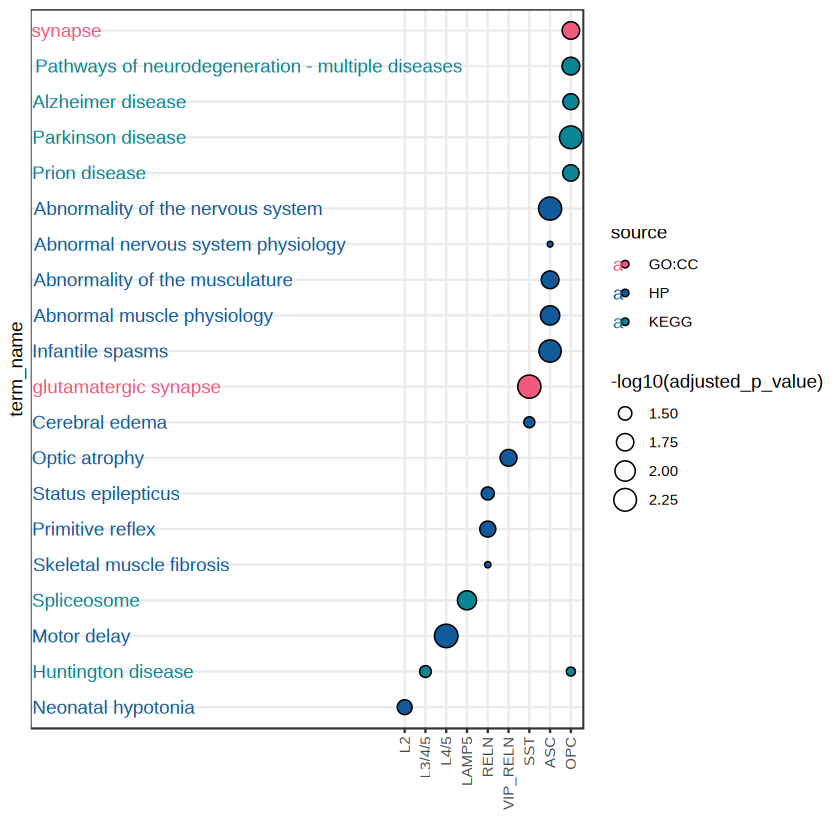

In [60]:
#godf.hub = godf[grepl(godf$term_name,pattern = "synap|dendrite"),]
godf.hub = godf[grepl(godf$term_name,pattern = "cort|neuron|synap|dendrite") | godf$source %in% c("HP","KEGG"),]
gocolors = c("#DC8686","#F05A7E","#125B9A","#0B8494")
gocolors = c("#F05A7E","#125B9A","#0B8494")
# godf.hub = godf[grepl(godf$term_name,pattern = "neuron|synap|dendrite") | godf$source %in% c("HP","KEGG","GO:CC","GO:BP"),]
# godf.hub = godf
# godf.hub = godf.hub[godf.hub$term_name != "anterograde trans-synaptic signaling",]
godf.hub$areatr = factor(godf.hub$areatr,levels = suborder[suborder %in% godf.hub$areatr])
pgot = ggplot(data = godf.hub) + 
     # geom_rect(data = unique(godft[,c("term_name","source")]),
     #                               aes(ymin = as.numeric(term_name)-0.5,ymax = as.numeric(term_name)+0.5,
     #                                                        xmin = -Inf,xmax = Inf,fill = source),
     #            alpha = 0.2) +
    geom_point(aes(x = areatr,y = term_name,size = -log10(adjusted_p_value),fill = source),shape = 21,color = "black") +
    geom_text(data = unique(godf.hub[,c("term_name","source")]),
              aes(y = term_name,label = term_name,x = -17,color = source),hjust = -0.01) +
    #scale_fill_frontiers() + 
    #scale_color_frontiers() + 
    scale_color_manual(values = gocolors) +
    scale_fill_manual(values = gocolors) +
    # scale_color_manual(values = mycolor) +
#    facet_grid(group~.,scales = "free",space = "free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 90,vjust = 0.5,hjust = 1),
        axis.text.y = element_blank(),  
       axis.ticks.y = element_blank(),
      panel.spacing = unit(0,'lines'),
      #panel.grid.major = element_blank(),
      #panel.grid.minor = element_blank(),
      panel.border = element_rect(fill = NA)) + xlab("")
pgot
ggexport(pgot,filename = "result/figure3/sigiso_subclass_transcript_dr_cluster_heatmap_Within_GO_25_11_28.pdf",width = 6,height = 7)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 130 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 97 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom

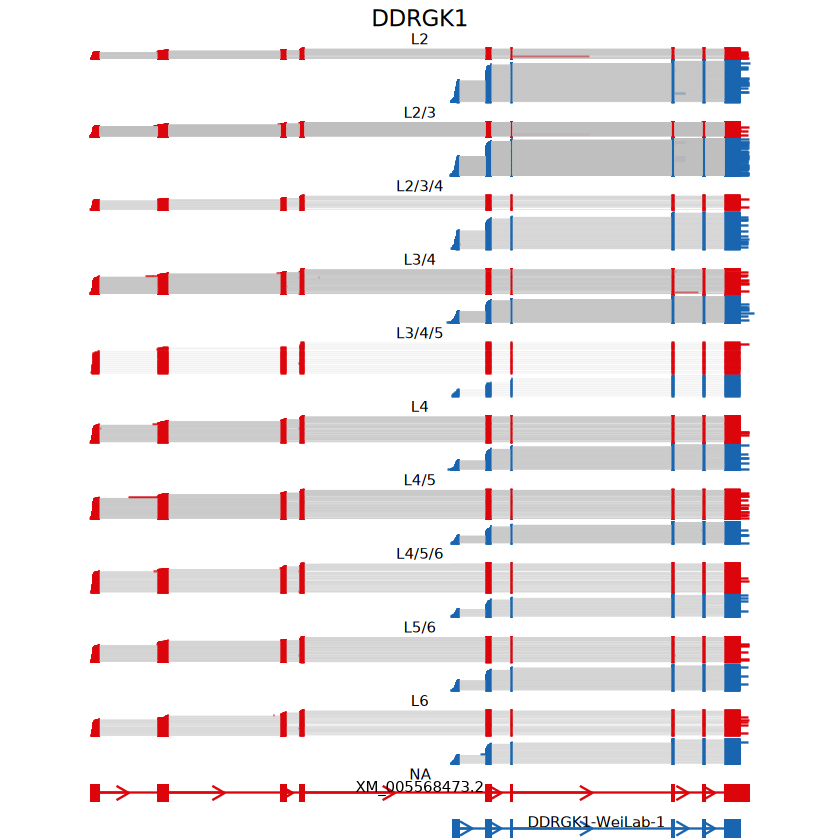

In [19]:
geneex = "DDRGK1"
mycolor = c('#1965B0','#DC050C')
grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",geneex,NULL)
grtdfl = grtdfl[grtdfl$group %in% cellan[cellan$class == "GLU",]$subclass,]
grtdfl = grtdfl %>% group_by (readid) %>% filter(n()>2)
pclsi = tryCatch(IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolor), 
                                                  error = function(e) NULL)
pclsi
ggexport(pclsi,filename = "/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/case_subclass_readsplice_point_DDRGK1_25_01_28.pdf",width = 4,height = 5)

In [27]:
geneex = "TUSC3"
fileid = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/readsplice_case",
                geneex,"_24_12_16.pdf")
grtdfl = BuildPlotBed(fsraw.cor,longbed,"subclass",geneex,NULL)
#grtdfl = grtdfl %>% group_by (readid) %>% filter(n()>3)
pclsi = tryCatch(IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,NULL), 
                                                  error = function(e) NULL)
pclsi
ggexport(pclsi,filename = fileid,width = 5,height = 12)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 52 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 27 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_se

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [29]:
geneex = "RBFOX1"
fileid = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/readsplice_case_",
                geneex,"_24_12_16.pdf")
grtdfl = BuildPlotBed(fsraw.cor,longbed,"class",geneex,NULL)
#grtdfl = grtdfl %>% group_by (readid) %>% filter(n()>3)
pclsi = tryCatch(IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = T,NULL), 
                                                  error = function(e) NULL)
pclsi
ggexport(pclsi,filename = fileid,width = 5,height = 4)

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 106 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 50 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 8 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 44 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message in grid.newpage():
"Cannot open temporary file '/tmp/RtmphekSUb/pdf144452ddb770e' for compression (reason: No such file or directory); compression has been turned off for this device"
Warning message:
"Removed 106 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning me

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 1966 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1963 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1966 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1963 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
file saved to /cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/readsplice_case_CDC42_24_12_16.pdf



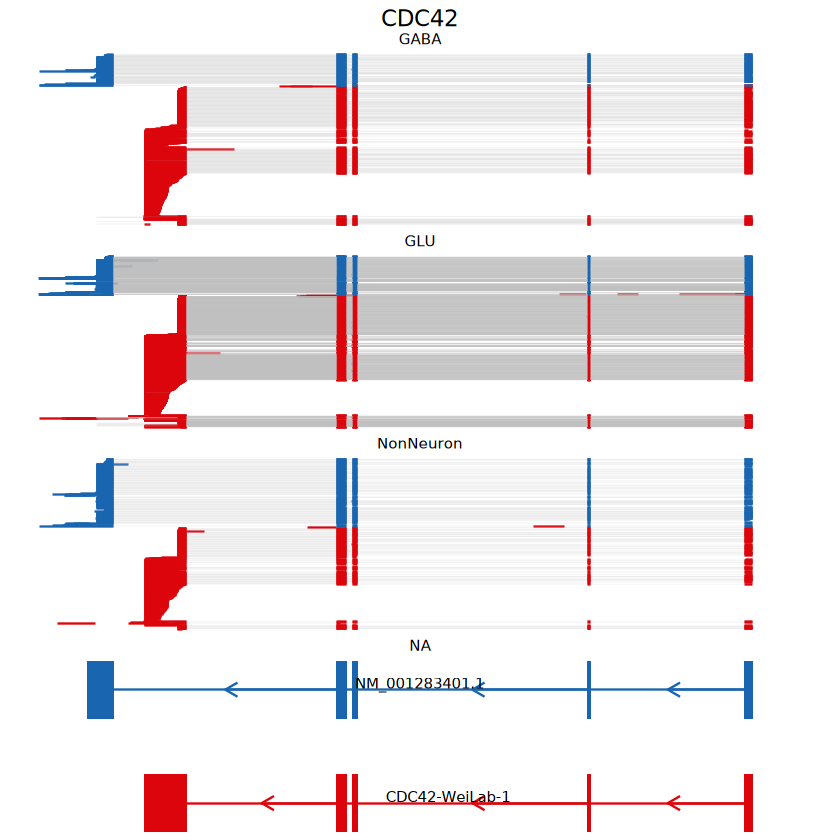

In [34]:
geneex = "CDC42"
fileid = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/downstream_analysis/result/figure3/readsplice_case_",
                geneex,"_24_12_16.pdf")
mycolor = c('#DC050C','#1965B0')
grtdfl = BuildPlotBed(fsraw.cor,longbed,"class",geneex,NULL)
pclsi = tryCatch(IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = T,mycolor), 
                                                  error = function(e) NULL)
pclsi
ggexport(pclsi,filename = fileid,width = 5,height = 4)